In [1]:
%load_ext autoreload
from ipynb.fs.defs.tmf_fxns import *
%matplotlib inline
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
%aimport

Modules to reload:


Modules to skip:



In [3]:
obs = read_obs_sst('hadisst')

In [4]:
obsdt  = detrend_obs(obs.squeeze(), method='gmr')
obsldt = detrend_obs(obs.squeeze(), method='lin')
obsedt = detrend_obs(obs.squeeze(), method='eof')
obsqdt = detrend_obs(obs.squeeze(), method='quad')

In [5]:
obsf   = filt_sst(obs.expand_dims({'member':[0]}),    'lanczos')
obsdt  = filt_sst(obsdt.expand_dims({'member':[0]}),  'lanczos')
obsldt = filt_sst(obsldt.expand_dims({'member':[0]}), 'lanczos')
obsedt = filt_sst(obsedt.expand_dims({'member':[0]}), 'lanczos')
obsqdt = filt_sst(obsqdt.expand_dims({'member':[0]}), 'lanczos')

In [6]:
obs_natl_eof,    obs_natl_pc,    obs_natl_vp,    obs_natl_am    = compute_natl_eof_pc_am(obs.squeeze(),    obs=True)
obsdt_natl_eof,  obsdt_natl_pc,  obsdt_natl_vp,  obsdt_natl_am  = compute_natl_eof_pc_am(obsdt.squeeze(),  obs=True)
obsldt_natl_eof, obsldt_natl_pc, obsldt_natl_vp, obsldt_natl_am = compute_natl_eof_pc_am(obsldt.squeeze(), obs=True)
obsqdt_natl_eof, obsqdt_natl_pc, obsqdt_natl_vp, obsqdt_natl_am = compute_natl_eof_pc_am(obsqdt.squeeze(), obs=True)
obsedt_natl_eof, obsedt_natl_pc, obsedt_natl_vp, obsedt_natl_am = compute_natl_eof_pc_am(obsedt.squeeze(), obs=True)

obs_npac_eof,    obs_npac_pc,    obs_npac_vp,    obs_npac_am    = compute_npac_eof_pc_am(obs.squeeze(),    obs=True)
obsdt_npac_eof,  obsdt_npac_pc,  obsdt_npac_vp,  obsdt_npac_am  = compute_npac_eof_pc_am(obsdt.squeeze(),  obs=True)
obsldt_npac_eof, obsldt_npac_pc, obsldt_npac_vp, obsldt_npac_am = compute_npac_eof_pc_am(obsldt.squeeze(), obs=True)
obsqdt_npac_eof, obsqdt_npac_pc, obsqdt_npac_vp, obsqdt_npac_am = compute_npac_eof_pc_am(obsqdt.squeeze(), obs=True)
obsedt_npac_eof, obsedt_npac_pc, obsedt_npac_vp, obsedt_npac_am = compute_npac_eof_pc_am(obsedt.squeeze(), obs=True)


Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!


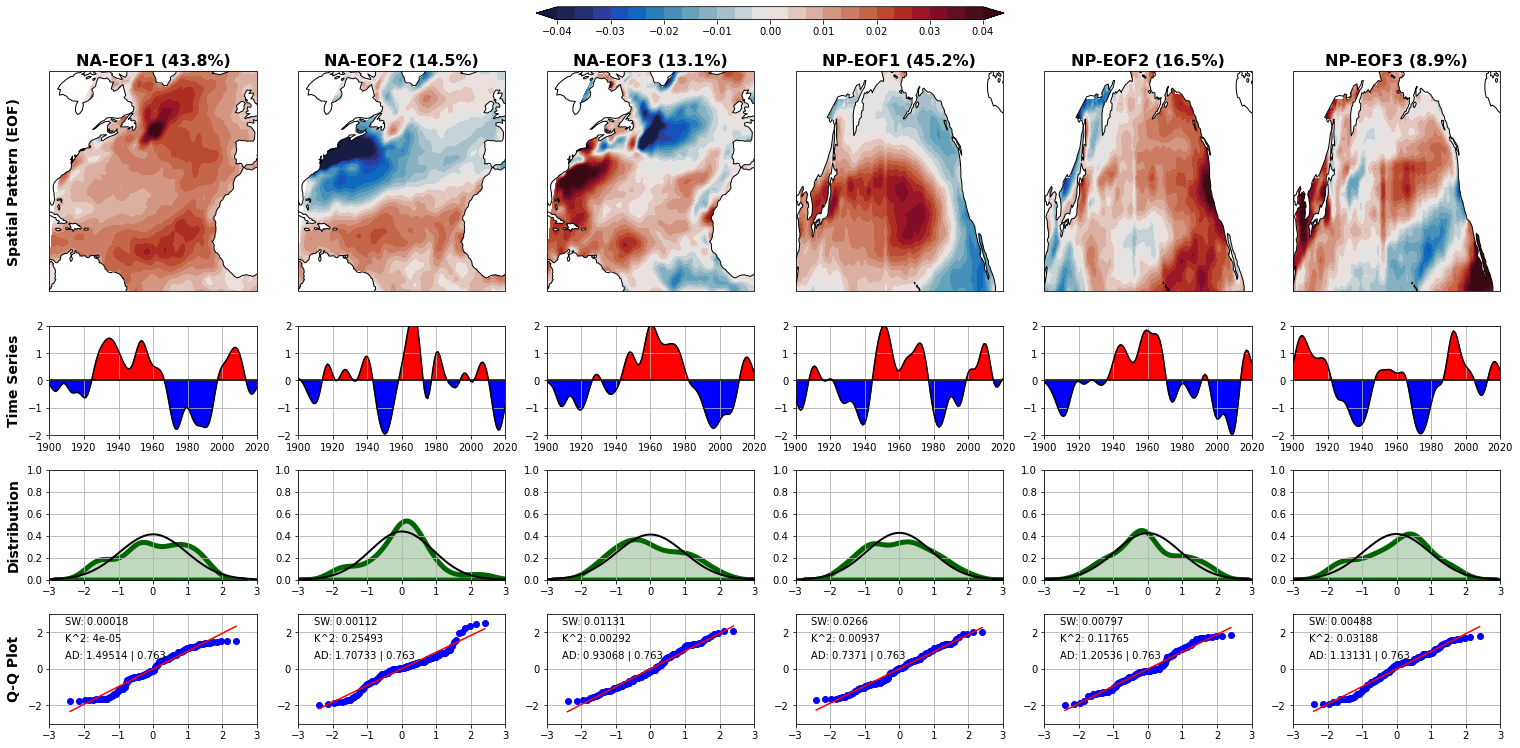

In [7]:
from matplotlib import gridspec
import string

y, x = 6, 4

fig = plt.figure(figsize=(26,12), facecolor='white')
plt.subplots_adjust(wspace=.2, hspace=.25)
gs =  gridspec.GridSpec(4,6, height_ratios=[2,1,1,1])

ts = [obsdt_natl_pc[0,:,0], obsdt_natl_pc[0,:,1], obsdt_natl_pc[0,:,2], obsdt_npac_pc[0,:,0], obsdt_npac_pc[0,:,1], obsdt_npac_pc[0,:,2]]
sp = [obsdt_natl_eof[0,0,:,:], obsdt_natl_eof[0,1,:,:], obsdt_natl_eof[0,2,:,:], obsdt_npac_eof[0,0,:,:], obsdt_npac_eof[0,1,:,:], obsdt_npac_eof[0,2,:,:]]
vp = [obsdt_natl_vp[0,0], obsdt_natl_vp[0,1], obsdt_natl_vp[0,2], obsdt_npac_vp[0,0], obsdt_npac_vp[0,1], obsdt_npac_vp[0,2]]
lb = ['NA-EOF1', 'NA-EOF2', 'NA-EOF3', 'NP-EOF1', 'NP-EOF2', 'NP-EOF3']
cl = [0, 0, 0, 180, 180, 180]

wt   = lanc(10, 1/10)
feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical', scale='110m', edgecolor='black', facecolor='white')

for i in np.arange(y):
    ax1 = plt.subplot(gs[i], projection=ccrs.Robinson(central_longitude=cl[i]))
    cbar = ax1.contourf(sp[i].lon, sp[i].lat, sp[i], levels=np.linspace(-.04,.04,25), extend='both', cmap=cmo.balance, transform=ccrs.PlateCarree())
    ax1.add_feature(feature)
    ax1.set_aspect('auto')
    ax1.set_title(lb[i] + ' (' + str(np.round(vp[i].values*100, 1)) + '%)', fontsize=16, fontweight='bold')
        
    ts0 = ts[i]/np.std(ts[i])
    ts0 = np.convolve(wt, ts0, mode='same')
    ax2 = plt.subplot(gs[6+i])
    ax2.plot(obs.year, ts0, color='black')
    ax2.plot(obs.year, [0]*obs.year.shape[0], color='black')
    ax2.fill_between(obs.year, ts0, [0]*obs.year.shape[0], where=ts0>0, color='red')
    ax2.fill_between(obs.year, ts0, [0]*obs.year.shape[0], where=ts0<0, color='blue')
    ax2.grid()
    ax2.set_ylim([-2,2])
    ax2.set_xlim([1900, 2020])
    
    mu, std = scipy.stats.norm.fit(ts0)
    ax3 = plt.subplot(gs[12+i])
    sns.kdeplot(ts0, color='darkgreen', ax=ax3, linewidth=5, shade=True)
    ax3.grid()
    ax3.set_ylim([0,1])
    ax3.set_xlim([-3,3])
    
    ax4 = plt.subplot(gs[18+i])
    qqplot(ts0, line='s', ax=ax4)
    ax4.grid()
    ax4.set_ylim([-3,3])
    ax4.set_xlim([-3,3])
    
    xmin, xmax = ax3.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    ax3.plot(x, p, 'k', linewidth=2)
    
    stat0, p0 = shapiro(ts0)
    stat1, p1 = normaltest(ts0)
    result    = anderson(ts0)
    
    ax4.text(0.075,0.90,'SW: ' + str(np.round(p0, 5)), transform=ax4.transAxes)
    ax4.text(0.075,0.75,'K^2: ' + str(np.round(p1, 5)), transform=ax4.transAxes)
    ax4.text(0.075,0.60,'AD: ' + str(np.round(result.statistic, 5)) + ' | ' + str(np.round(result.critical_values[2], 3)), transform=ax4.transAxes)
    
    ax3.set_ylabel('')
    ax4.set_ylabel('')
    ax4.set_xlabel('')

    if (i == 0):
        ax1.text(-0.17, 0.5, 'Spatial Pattern (EOF)', ha='center', va='center', transform=ax1.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        ax2.text(-0.17, 0.5, 'Time Series',           ha='center', va='center', transform=ax2.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        ax3.text(-0.17, 0.5, 'Distribution',          ha='center', va='center', transform=ax3.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        ax4.text(-0.17, 0.5, 'Q-Q Plot',              ha='center', va='center', transform=ax4.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        
cax = fig.add_axes([0.385, 0.94, 0.25, 0.015])
cb = fig.colorbar(cbar, orientation='horizontal', cax=cax)
       
#plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/amo_vs_pdo_new/obs_fig1_v2.pdf', bbox_inches='tight')



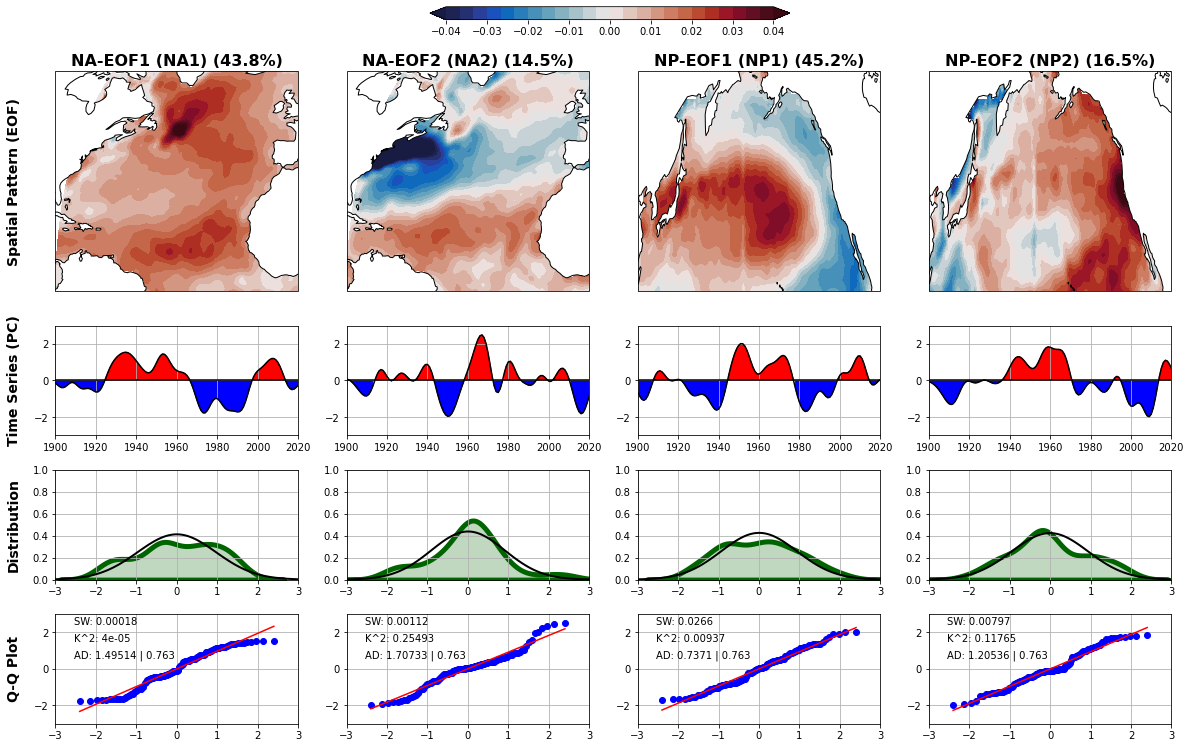

In [8]:
from matplotlib import gridspec
import string

y, x = 4, 4

fig = plt.figure(figsize=(20,12), facecolor='white')
plt.subplots_adjust(wspace=.2, hspace=.25)
gs =  gridspec.GridSpec(4,4, height_ratios=[2,1,1,1])

ts = [obsdt_natl_pc[0,:,0], obsdt_natl_pc[0,:,1], obsdt_npac_pc[0,:,0], obsdt_npac_pc[0,:,1]]
sp = [obsdt_natl_eof[0,0,:,:], obsdt_natl_eof[0,1,:,:], obsdt_npac_eof[0,0,:,:], obsdt_npac_eof[0,1,:,:]]
vp = [obsdt_natl_vp[0,0], obsdt_natl_vp[0,1], obsdt_npac_vp[0,0], obsdt_npac_vp[0,1]]
lb = ['NA-EOF1 (NA1)', 'NA-EOF2 (NA2)', 'NP-EOF1 (NP1)', 'NP-EOF2 (NP2)']
cl = [0, 0, 180, 180]

wt   = lanc(10, 1/10)
feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical', scale='110m', edgecolor='black', facecolor='white')

for i in np.arange(y):
    ax1 = plt.subplot(gs[i], projection=ccrs.Robinson(central_longitude=cl[i]))
    cbar = ax1.contourf(sp[i].lon, sp[i].lat, sp[i], levels=np.linspace(-.04,.04,25), extend='both', cmap=cmo.balance, transform=ccrs.PlateCarree())
    ax1.add_feature(feature)
    ax1.set_aspect('auto')
    ax1.set_title(lb[i] + ' (' + str(np.round(vp[i].values*100, 1)) + '%)', fontsize=16, fontweight='bold')
        
    ts0 = ts[i]/np.std(ts[i])
    ts0 = np.convolve(wt, ts0, mode='same')
    ax2 = plt.subplot(gs[4+i])
    ax2.plot(obs.year, ts0, color='black')
    ax2.plot(obs.year, [0]*obs.year.shape[0], color='black')
    ax2.fill_between(obs.year, ts0, [0]*obs.year.shape[0], where=ts0>0, color='red')
    ax2.fill_between(obs.year, ts0, [0]*obs.year.shape[0], where=ts0<0, color='blue')
    ax2.grid()
    ax2.set_ylim([-3,3])
    ax2.set_xlim([1900, 2020])
    
    mu, std = scipy.stats.norm.fit(ts0)
    ax3 = plt.subplot(gs[8+i])
    sns.kdeplot(ts0, color='darkgreen', ax=ax3, linewidth=5, shade=True)
    ax3.grid()
    ax3.set_ylim([0,1])
    ax3.set_xlim([-3,3])
    
    ax4 = plt.subplot(gs[12+i])
    qqplot(ts0, line='s', ax=ax4)
    ax4.grid()
    ax4.set_ylim([-3,3])
    ax4.set_xlim([-3,3])
    
    xmin, xmax = ax3.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    ax3.plot(x, p, 'k', linewidth=2)
    
    stat0, p0 = shapiro(ts0)
    stat1, p1 = normaltest(ts0)
    result    = anderson(ts0)
    
    ax4.text(0.075,0.90,'SW: ' + str(np.round(p0, 5)), transform=ax4.transAxes)
    ax4.text(0.075,0.75,'K^2: ' + str(np.round(p1, 5)), transform=ax4.transAxes)
    ax4.text(0.075,0.60,'AD: ' + str(np.round(result.statistic, 5)) + ' | ' + str(np.round(result.critical_values[2], 3)), transform=ax4.transAxes)
    
    ax3.set_ylabel('')
    ax4.set_ylabel('')
    ax4.set_xlabel('')

    if (i == 0):
        ax1.text(-0.17, 0.5, 'Spatial Pattern (EOF)', ha='center', va='center', transform=ax1.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        ax2.text(-0.17, 0.5, 'Time Series (PC)',      ha='center', va='center', transform=ax2.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        ax3.text(-0.17, 0.5, 'Distribution',          ha='center', va='center', transform=ax3.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        ax4.text(-0.17, 0.5, 'Q-Q Plot',              ha='center', va='center', transform=ax4.transAxes, rotation='vertical', rotation_mode='anchor', fontsize=14, fontweight='bold')
        
cax = fig.add_axes([0.385, 0.94, 0.25, 0.015])
cb = fig.colorbar(cbar, orientation='horizontal', cax=cax)
       
plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/obs_spat_times_stats.pdf', bbox_inches='tight')
 

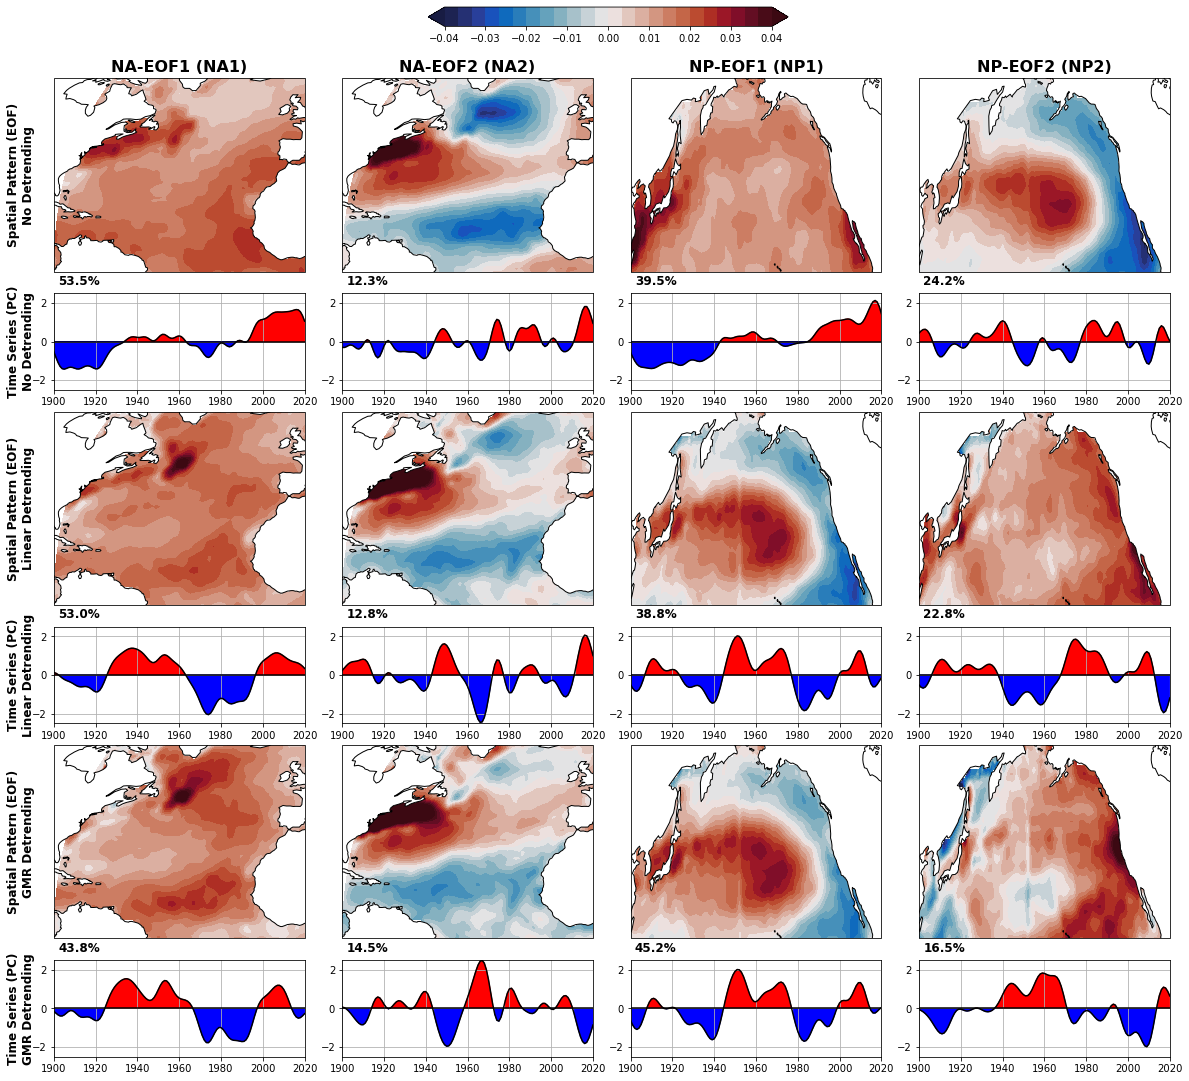

In [9]:
from matplotlib import gridspec
import string

y, x = 6, 4

fig = plt.figure(figsize=(20,18), facecolor='white')
plt.subplots_adjust(wspace=.15, hspace=.15)
gs =  gridspec.GridSpec(6,4, height_ratios=[2,1,2,1,2,1])

ts = [obs_natl_pc[0,:,0], obs_natl_pc[0,:,1], obs_npac_pc[0,:,0], obs_npac_pc[0,:,1]]
sp = [obs_natl_eof[0,0,:,:], obs_natl_eof[0,1,:,:], obs_npac_eof[0,0,:,:], -obs_npac_eof[0,1,:,:]]
vp = [obs_natl_vp[0,0], obs_natl_vp[0,1], obs_npac_vp[0,0], obs_npac_vp[0,1]]

lts = [obsldt_natl_pc[0,:,0], obsldt_natl_pc[0,:,1], obsldt_npac_pc[0,:,0], obsldt_npac_pc[0,:,1]]
lsp = [obsldt_natl_eof[0,0,:,:], obsldt_natl_eof[0,1,:,:], obsldt_npac_eof[0,0,:,:], -obsldt_npac_eof[0,1,:,:]]
lvp = [obsldt_natl_vp[0,0], obsldt_natl_vp[0,1], obsldt_npac_vp[0,0], obsldt_npac_vp[0,1]]

gts = [obsdt_natl_pc[0,:,0], obsdt_natl_pc[0,:,1], obsdt_npac_pc[0,:,0], obsdt_npac_pc[0,:,1]]
gsp = [obsdt_natl_eof[0,0,:,:], -obsdt_natl_eof[0,1,:,:], obsdt_npac_eof[0,0,:,:], obsdt_npac_eof[0,1,:,:]]
gvp = [obsdt_natl_vp[0,0], obsdt_natl_vp[0,1], obsdt_npac_vp[0,0], obsdt_npac_vp[0,1]]

lb = ['NA-EOF1 (NA1)', 'NA-EOF2 (NA2)', 'NP-EOF1 (NP1)', 'NP-EOF2 (NP2)']
cl = [0, 0, 180, 180]

wt   = lanc(10, 1/10)
feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical', scale='110m', edgecolor='black', facecolor='white')

for i in np.arange(x):

    ax1 = plt.subplot(gs[i], projection=ccrs.Robinson(central_longitude=cl[i]))
    cbar = ax1.contourf(sp[i].lon, sp[i].lat, sp[i], levels=np.linspace(-.04,.04,25), extend='both', cmap=cmo.balance, transform=ccrs.PlateCarree())
    ax1.add_feature(feature)
    ax1.set_aspect('auto')
    ax1.set_title(lb[i], fontsize=16, fontweight='bold')
    ax1.text(.1,-.05, str(np.round(vp[i].values*100, 1)) + '%', ha='center', va='center', transform=ax1.transAxes, fontsize=12, fontweight='bold')
       
    ts0 = ts[i]/np.std(ts[i])
    ts0 = np.convolve(wt, ts0, mode='same')
    ax2 = plt.subplot(gs[4+i])
    ax2.plot(obs.year, ts0, color='black')
    ax2.plot(obs.year, [0]*obs.year.shape[0], color='black')
    ax2.fill_between(obs.year, ts0, [0]*obs.year.shape[0], where=ts0>0, color='red')
    ax2.fill_between(obs.year, ts0, [0]*obs.year.shape[0], where=ts0<0, color='blue')
    ax2.grid()
    ax2.set_ylim([-2.5,2.5])
    ax2.set_xlim([1900, 2020])

    ax3 = plt.subplot(gs[8+i], projection=ccrs.Robinson(central_longitude=cl[i]))
    cbar = ax3.contourf(lsp[i].lon, lsp[i].lat, lsp[i], levels=np.linspace(-.04,.04,25), extend='both', cmap=cmo.balance, transform=ccrs.PlateCarree())
    ax3.add_feature(feature)
    ax3.set_aspect('auto')
    ax3.text(.1,-.05, str(np.round(lvp[i].values*100, 1)) + '%', ha='center', va='center', transform=ax3.transAxes, fontsize=12, fontweight='bold')
        
    lts0 = lts[i]/np.std(lts[i])
    lts0 = np.convolve(wt, lts0, mode='same')
    ax4 = plt.subplot(gs[12+i])
    ax4.plot(obs.year, lts0, color='black')
    ax4.plot(obs.year, [0]*obs.year.shape[0], color='black')
    ax4.fill_between(obs.year, lts0, [0]*obs.year.shape[0], where=lts0>0, color='red')
    ax4.fill_between(obs.year, lts0, [0]*obs.year.shape[0], where=lts0<0, color='blue')
    ax4.grid()
    ax4.set_ylim([-2.5,2.5])
    ax4.set_xlim([1900, 2020])
    
    ax5 = plt.subplot(gs[16+i], projection=ccrs.Robinson(central_longitude=cl[i]))
    cbar = ax5.contourf(gsp[i].lon, gsp[i].lat, gsp[i], levels=np.linspace(-.04,.04,25), extend='both', cmap=cmo.balance, transform=ccrs.PlateCarree())
    ax5.add_feature(feature)
    ax5.set_aspect('auto')
    ax5.text(.1,-.05, str(np.round(gvp[i].values*100, 1)) + '%', ha='center', va='center', transform=ax5.transAxes, fontsize=12, fontweight='bold')
    
    gts0 = gts[i]/np.std(gts[i])
    gts0 = np.convolve(wt, gts0, mode='same')
    ax6 = plt.subplot(gs[20+i])
    ax6.plot(obs.year, gts0, color='black')
    ax6.plot(obs.year, [0]*obs.year.shape[0], color='black')
    ax6.fill_between(obs.year, gts0, [0]*obs.year.shape[0], where=gts0>0, color='red')
    ax6.fill_between(obs.year, gts0, [0]*obs.year.shape[0], where=gts0<0, color='blue')
    ax6.grid()
    ax6.set_ylim([-2.5,2.5])
    ax6.set_xlim([1900, 2020])
    


plt.subplot( gs[0]).text(-0.13, 0.5, 'Spatial Pattern (EOF)\nNo Detrending',     ha='center', va='center', transform=plt.subplot(gs[0]).transAxes,  rotation='vertical', rotation_mode='anchor', fontsize=12, fontweight='bold')
plt.subplot( gs[4]).text(-0.13, 0.5, 'Time Series (PC)\nNo Detrending',          ha='center', va='center', transform=plt.subplot(gs[4]).transAxes,  rotation='vertical', rotation_mode='anchor', fontsize=12, fontweight='bold')
plt.subplot( gs[8]).text(-0.13, 0.5, 'Spatial Pattern (EOF)\nLinear Detrending', ha='center', va='center', transform=plt.subplot(gs[8]).transAxes,  rotation='vertical', rotation_mode='anchor', fontsize=12, fontweight='bold')
plt.subplot(gs[12]).text(-0.13, 0.5, 'Time Series (PC)\nLinear Detrending',      ha='center', va='center', transform=plt.subplot(gs[12]).transAxes, rotation='vertical', rotation_mode='anchor', fontsize=12, fontweight='bold')
plt.subplot(gs[16]).text(-0.13, 0.5, 'Spatial Pattern (EOF)\nGMR Detrending',    ha='center', va='center', transform=plt.subplot(gs[16]).transAxes, rotation='vertical', rotation_mode='anchor', fontsize=12, fontweight='bold')
plt.subplot(gs[20]).text(-0.13, 0.5, 'Time Series (PC)\nGMR Detrending',         ha='center', va='center', transform=plt.subplot(gs[20]).transAxes, rotation='vertical', rotation_mode='anchor', fontsize=12, fontweight='bold')

    
cax = fig.add_axes([0.385, 0.92, 0.25, 0.015])
cb = fig.colorbar(cbar, orientation='horizontal', cax=cax)
       
plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/dt_methods_spat_times.pdf', bbox_inches='tight')
 

In [10]:
obs_pc1_pc1_xcorrs = calc_xcorrs(obs_natl_pc[:,:,0], obs_npac_pc[:,:,0])
obs_pc1_pc2_xcorrs = calc_xcorrs(obs_natl_pc[:,:,0], obs_npac_pc[:,:,1])
obs_pc2_pc1_xcorrs = calc_xcorrs(obs_natl_pc[:,:,1], obs_npac_pc[:,:,0])
obs_pc2_pc2_xcorrs = calc_xcorrs(obs_natl_pc[:,:,1], obs_npac_pc[:,:,1])

obsdt_pc1_pc1_xcorrs = calc_xcorrs(obsdt_natl_pc[:,:,0], obsdt_npac_pc[:,:,0])
obsdt_pc1_pc2_xcorrs = calc_xcorrs(obsdt_natl_pc[:,:,0], obsdt_npac_pc[:,:,1])
obsdt_pc2_pc1_xcorrs = calc_xcorrs(obsdt_natl_pc[:,:,1], obsdt_npac_pc[:,:,0])
obsdt_pc2_pc2_xcorrs = calc_xcorrs(obsdt_natl_pc[:,:,1], obsdt_npac_pc[:,:,1])

obsldt_pc1_pc1_xcorrs = calc_xcorrs(obsldt_natl_pc[:,:,0], obsldt_npac_pc[:,:,0])
obsldt_pc1_pc2_xcorrs = calc_xcorrs(obsldt_natl_pc[:,:,0], obsldt_npac_pc[:,:,1])
obsldt_pc2_pc1_xcorrs = calc_xcorrs(obsldt_natl_pc[:,:,1], obsldt_npac_pc[:,:,0])
obsldt_pc2_pc2_xcorrs = calc_xcorrs(obsldt_natl_pc[:,:,1], obsldt_npac_pc[:,:,1])


In [11]:
obs_pc1_pc1_sts = calc_sig_thres(obs_natl_pc[0,:,0], obs_npac_pc[0,:,0], thres=90)
obs_pc1_pc2_sts = calc_sig_thres(obs_natl_pc[0,:,0], obs_npac_pc[0,:,1], thres=90)
obs_pc2_pc1_sts = calc_sig_thres(obs_natl_pc[0,:,1], obs_npac_pc[0,:,0], thres=90)
obs_pc2_pc2_sts = calc_sig_thres(obs_natl_pc[0,:,1], obs_npac_pc[0,:,1], thres=90)

obsdt_pc1_pc1_sts = calc_sig_thres(obsdt_natl_pc[0,:,0], obsdt_npac_pc[0,:,0], thres=90)
obsdt_pc1_pc2_sts = calc_sig_thres(obsdt_natl_pc[0,:,0], obsdt_npac_pc[0,:,1], thres=90)
obsdt_pc2_pc1_sts = calc_sig_thres(obsdt_natl_pc[0,:,1], obsdt_npac_pc[0,:,0], thres=90)
obsdt_pc2_pc2_sts = calc_sig_thres(obsdt_natl_pc[0,:,1], obsdt_npac_pc[0,:,1], thres=90)

obsldt_pc1_pc1_sts = calc_sig_thres(obsldt_natl_pc[0,:,0], obsldt_npac_pc[0,:,0], thres=90)
obsldt_pc1_pc2_sts = calc_sig_thres(obsldt_natl_pc[0,:,0], obsldt_npac_pc[0,:,1], thres=90)
obsldt_pc2_pc1_sts = calc_sig_thres(obsldt_natl_pc[0,:,1], obsldt_npac_pc[0,:,0], thres=90)
obsldt_pc2_pc2_sts = calc_sig_thres(obsldt_natl_pc[0,:,1], obsldt_npac_pc[0,:,1], thres=90)


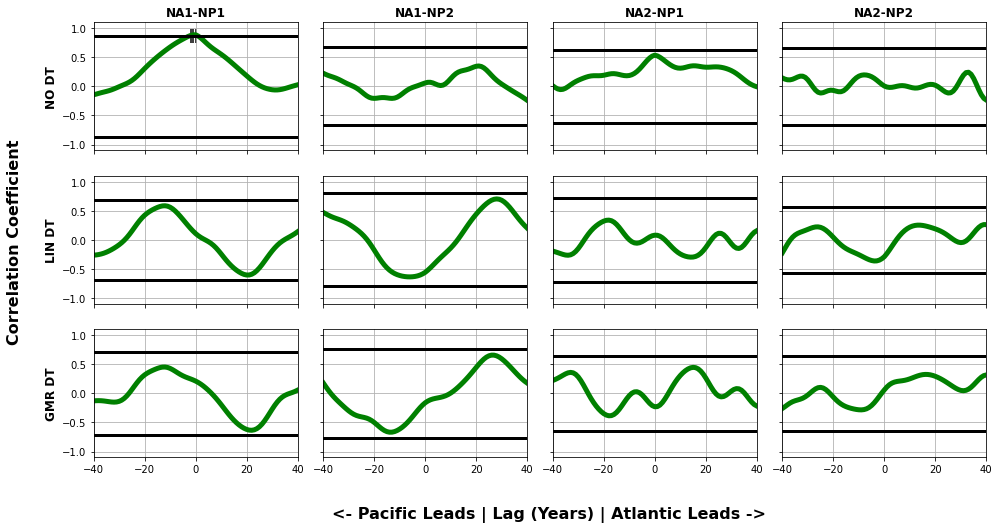

In [12]:
x, y = 3, 4

lags = np.linspace(-40,40,81) 

xcorrs = [[obs_pc1_pc1_xcorrs, obsldt_pc1_pc1_xcorrs,  obsdt_pc1_pc1_xcorrs],
          [obs_pc1_pc2_xcorrs, obsldt_pc1_pc2_xcorrs, -obsdt_pc1_pc2_xcorrs],
          [obs_pc2_pc1_xcorrs, obsldt_pc2_pc1_xcorrs,  obsdt_pc2_pc1_xcorrs],
          [obs_pc2_pc2_xcorrs, obsldt_pc2_pc2_xcorrs,  obsdt_pc2_pc2_xcorrs]]

sts = [[obs_pc1_pc1_sts, obsldt_pc1_pc1_sts, obsdt_pc1_pc1_sts],
       [obs_pc1_pc2_sts, obsldt_pc1_pc2_sts, obsdt_pc1_pc2_sts],
       [obs_pc2_pc1_sts, obsldt_pc2_pc1_sts, obsdt_pc2_pc1_sts],
       [obs_pc2_pc2_sts, obsldt_pc2_pc2_sts, obsdt_pc2_pc2_sts]]


ylabels = ['NO DT', 'LIN DT', 'GMR DT']
xlabels = ['NA1-NP1', 'NA1-NP2', 'NA2-NP1', 'NA2-NP2']

fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(16,8), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.125, hspace=.2)

for i in np.arange(x):
    for j in np.arange(y):
    
        ax[i][j].plot(lags, xcorrs[j][i][0,:], color='green', linewidth=5)
        ax[i][j].plot(lags, sts[j][i][0,:],    color='black', linewidth=3)
        ax[i][j].plot(lags, [-x for x in sts[j][i][0,:]], color='black', linewidth=3)
    
        idx = np.where(np.abs(xcorrs[j][i][0,:]) > sts[j][i][0,:])

        ax[i][j].scatter(lags[idx], np.asarray(sts[j][i][0,:])[idx], marker='|', color='black', s=200)
        
        ax[i][j].grid()
        ax[i][j].set_xlim([-40,40])
        ax[i][j].set_ylim([-1.1,1.1])
        
        ax[0][j].set_title(xlabels[j], fontweight='bold', fontsize=12)
        ax[i][0].set_ylabel(ylabels[i], fontweight='bold', fontsize=12)

fig.text(0.52, 0.02, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.05, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/obs_xcorr_matrix.pdf', bbox_inches='tight')
 

In [13]:
canesm2   = load_mmlea('canesm2')
cesm      = load_mmlea('cesm')
csiro     = load_mmlea('csiro_mk36')
gfdlcm3   = load_mmlea('gfdl_cm3')
gfdlesm2m = load_mmlea('gfdl_esm2m')
mpi       = load_mmlea('mpi')

In [14]:
canesm2   = filt_sst(canesm2,   'lanczos')
cesm      = filt_sst(cesm,      'lanczos')
csiro     = filt_sst(csiro,     'lanczos')
gfdlcm3   = filt_sst(gfdlcm3,   'lanczos')
gfdlesm2m = filt_sst(gfdlesm2m, 'lanczos')
mpi       = filt_sst(mpi,       'lanczos')

In [15]:
canesm2_full,   canesm2_em,   canesm2_int   = split_model_sst(  canesm2)
cesm_full,      cesm_em,      cesm_int      = split_model_sst(     cesm)
csiro_full,     csiro_em,     csiro_int     = split_model_sst(    csiro)
gfdlcm3_full,   gfdlcm3_em,   gfdlcm3_int   = split_model_sst(  gfdlcm3)
gfdlesm2m_full, gfdlesm2m_em, gfdlesm2m_int = split_model_sst(gfdlesm2m)
mpi_full,       mpi_em,       mpi_int       = split_model_sst(      mpi)

In [16]:
canesm2_full_natl_eof,  canesm2_full_natl_pc,  canesm2_full_natl_vp,  canesm2_full_natl_am  = compute_natl_eof_pc_am(canesm2_full)
canesm2_em_natl_eof,    canesm2_em_natl_pc,    canesm2_em_natl_vp,    canesm2_em_natl_am    = compute_natl_eof_pc_am(canesm2_em)
canesm2_int_natl_eof,   canesm2_int_natl_pc,   canesm2_int_natl_vp,   canesm2_int_natl_am   = compute_natl_eof_pc_am(canesm2_int)
#canesm2_gmrdt_natl_eof, canesm2_gmrdt_natl_pc, canesm2_gmrdt_natl_vp, canesm2_gmrdt_natl_am = compute_natl_eof_pc_am(canesm2_gmrdt)

cesm_full_natl_eof,  cesm_full_natl_pc,  cesm_full_natl_vp,  cesm_full_natl_am  = compute_natl_eof_pc_am(cesm_full)
cesm_em_natl_eof,    cesm_em_natl_pc,    cesm_em_natl_vp,    cesm_em_natl_am    = compute_natl_eof_pc_am(cesm_em)
cesm_int_natl_eof,   cesm_int_natl_pc,   cesm_int_natl_vp,   cesm_int_natl_am   = compute_natl_eof_pc_am(cesm_int)
#cesm_gmrdt_natl_eof, cesm_gmrdt_natl_pc, cesm_gmrdt_natl_vp, cesm_gmrdt_natl_am = compute_natl_eof_pc_am(cesm_gmrdt)

csiro_full_natl_eof,  csiro_full_natl_pc,  csiro_full_natl_vp,  csiro_full_natl_am  = compute_natl_eof_pc_am(csiro_full)
csiro_em_natl_eof,    csiro_em_natl_pc,    csiro_em_natl_vp,    csiro_em_natl_am    = compute_natl_eof_pc_am(csiro_em)
csiro_int_natl_eof,   csiro_int_natl_pc,   csiro_int_natl_vp,   csiro_int_natl_am   = compute_natl_eof_pc_am(csiro_int)
#csiro_gmrdt_natl_eof, csiro_gmrdt_natl_pc, csiro_gmrdt_natl_vp, csiro_gmrdt_natl_am = compute_natl_eof_pc_am(csiro_gmrdt)

gfdlcm3_full_natl_eof,  gfdlcm3_full_natl_pc,  gfdlcm3_full_natl_vp,  gfdlcm3_full_natl_am  = compute_natl_eof_pc_am(gfdlcm3_full)
gfdlcm3_em_natl_eof,    gfdlcm3_em_natl_pc,    gfdlcm3_em_natl_vp,    gfdlcm3_em_natl_am    = compute_natl_eof_pc_am(gfdlcm3_em)
gfdlcm3_int_natl_eof,   gfdlcm3_int_natl_pc,   gfdlcm3_int_natl_vp,   gfdlcm3_int_natl_am   = compute_natl_eof_pc_am(gfdlcm3_int)
#gfdlcm3_gmrdt_natl_eof, gfdlcm3_gmrdt_natl_pc, gfdlcm3_gmrdt_natl_vp, gfdlcm3_gmrdt_natl_am = compute_natl_eof_pc_am(gfdlcm3_gmrdt)

gfdlesm2m_full_natl_eof,  gfdlesm2m_full_natl_pc,  gfdlesm2m_full_natl_vp,  gfdlesm2m_full_natl_am  = compute_natl_eof_pc_am(gfdlesm2m_full)
gfdlesm2m_em_natl_eof,    gfdlesm2m_em_natl_pc,    gfdlesm2m_em_natl_vp,    gfdlesm2m_em_natl_am    = compute_natl_eof_pc_am(gfdlesm2m_em)
gfdlesm2m_int_natl_eof,   gfdlesm2m_int_natl_pc,   gfdlesm2m_int_natl_vp,   gfdlesm2m_int_natl_am   = compute_natl_eof_pc_am(gfdlesm2m_int)
#gfdlesm2m_gmrdt_natl_eof, gfdlesm2m_gmrdt_natl_pc, gfdlesm2m_gmrdt_natl_vp, gfdlesm2m_gmrdt_natl_am = compute_natl_eof_pc_am(gfdlesm2m_gmrdt)

mpi_full_natl_eof,  mpi_full_natl_pc,  mpi_full_natl_vp,  mpi_full_natl_am  = compute_natl_eof_pc_am(mpi_full)
mpi_em_natl_eof,    mpi_em_natl_pc,    mpi_em_natl_vp,    mpi_em_natl_am    = compute_natl_eof_pc_am(mpi_em)
mpi_int_natl_eof,   mpi_int_natl_pc,   mpi_int_natl_vp,   mpi_int_natl_am   = compute_natl_eof_pc_am(mpi_int)
#mpi_gmrdt_natl_eof, mpi_gmrdt_natl_pc, mpi_gmrdt_natl_vp, mpi_gmrdt_natl_am = compute_natl_eof_pc_am(mpi_gmrdt)


Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50, Complete!
Members Complete: 1, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39, Complete!
Members Complete: 1, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, Complete!
Members Complete: 1, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, Com

In [17]:
canesm2_full_npac_eof,  canesm2_full_npac_pc,  canesm2_full_npac_vp,  canesm2_full_npac_am  = compute_npac_eof_pc_am(canesm2_full)
canesm2_em_npac_eof,    canesm2_em_npac_pc,    canesm2_em_npac_vp,    canesm2_em_npac_am    = compute_npac_eof_pc_am(canesm2_em)
canesm2_int_npac_eof,   canesm2_int_npac_pc,   canesm2_int_npac_vp,   canesm2_int_npac_am   = compute_npac_eof_pc_am(canesm2_int)
#canesm2_gmrdt_npac_eof, canesm2_gmrdt_npac_pc, canesm2_gmrdt_npac_vp, canesm2_gmrdt_npac_am = compute_npac_eof_pc_am(canesm2_gmrdt)

cesm_full_npac_eof,  cesm_full_npac_pc,  cesm_full_npac_vp,  cesm_full_npac_am  = compute_npac_eof_pc_am(cesm_full)
cesm_em_npac_eof,    cesm_em_npac_pc,    cesm_em_npac_vp,    cesm_em_npac_am    = compute_npac_eof_pc_am(cesm_em)
cesm_int_npac_eof,   cesm_int_npac_pc,   cesm_int_npac_vp,   cesm_int_npac_am   = compute_npac_eof_pc_am(cesm_int)
#cesm_gmrdt_npac_eof, cesm_gmrdt_npac_pc, cesm_gmrdt_npac_vp, cesm_gmrdt_npac_am = compute_npac_eof_pc_am(cesm_gmrdt)

csiro_full_npac_eof,  csiro_full_npac_pc,  csiro_full_npac_vp,  csiro_full_npac_am  = compute_npac_eof_pc_am(csiro_full)
csiro_em_npac_eof,    csiro_em_npac_pc,    csiro_em_npac_vp,    csiro_em_npac_am    = compute_npac_eof_pc_am(csiro_em)
csiro_int_npac_eof,   csiro_int_npac_pc,   csiro_int_npac_vp,   csiro_int_npac_am   = compute_npac_eof_pc_am(csiro_int)
#csiro_gmrdt_npac_eof, csiro_gmrdt_npac_pc, csiro_gmrdt_npac_vp, csiro_gmrdt_npac_am = compute_npac_eof_pc_am(csiro_gmrdt)

gfdlcm3_full_npac_eof,  gfdlcm3_full_npac_pc,  gfdlcm3_full_npac_vp,  gfdlcm3_full_npac_am  = compute_npac_eof_pc_am(gfdlcm3_full)
gfdlcm3_em_npac_eof,    gfdlcm3_em_npac_pc,    gfdlcm3_em_npac_vp,    gfdlcm3_em_npac_am    = compute_npac_eof_pc_am(gfdlcm3_em)
gfdlcm3_int_npac_eof,   gfdlcm3_int_npac_pc,   gfdlcm3_int_npac_vp,   gfdlcm3_int_npac_am   = compute_npac_eof_pc_am(gfdlcm3_int)
#gfdlcm3_gmrdt_npac_eof, gfdlcm3_gmrdt_npac_pc, gfdlcm3_gmrdt_npac_vp, gfdlcm3_gmrdt_npac_am = compute_npac_eof_pc_am(gfdlcm3_gmrdt)

gfdlesm2m_full_npac_eof,  gfdlesm2m_full_npac_pc,  gfdlesm2m_full_npac_vp,  gfdlesm2m_full_npac_am  = compute_npac_eof_pc_am(gfdlesm2m_full)
gfdlesm2m_em_npac_eof,    gfdlesm2m_em_npac_pc,    gfdlesm2m_em_npac_vp,    gfdlesm2m_em_npac_am    = compute_npac_eof_pc_am(gfdlesm2m_em)
gfdlesm2m_int_npac_eof,   gfdlesm2m_int_npac_pc,   gfdlesm2m_int_npac_vp,   gfdlesm2m_int_npac_am   = compute_npac_eof_pc_am(gfdlesm2m_int)
#gfdlesm2m_gmrdt_npac_eof, gfdlesm2m_gmrdt_npac_pc, gfdlesm2m_gmrdt_npac_vp, gfdlesm2m_gmrdt_npac_am = compute_npac_eof_pc_am(gfdlesm2m_gmrdt)

mpi_full_npac_eof,  mpi_full_npac_pc,  mpi_full_npac_vp,  mpi_full_npac_am  = compute_npac_eof_pc_am(mpi_full)
mpi_em_npac_eof,    mpi_em_npac_pc,    mpi_em_npac_vp,    mpi_em_npac_am    = compute_npac_eof_pc_am(mpi_em)
mpi_int_npac_eof,   mpi_int_npac_pc,   mpi_int_npac_vp,   mpi_int_npac_am   = compute_npac_eof_pc_am(mpi_int)
#mpi_gmrdt_npac_eof, mpi_gmrdt_npac_pc, mpi_gmrdt_npac_vp, mpi_gmrdt_npac_am = compute_npac_eof_pc_am(mpi_gmrdt)


Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50, Complete!
Members Complete: 1, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39, Complete!
Members Complete: 1, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, Complete!
Members Complete: 1, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, Complete!
Members Complete: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, Com

In [18]:
canesm2pi   = read_ctrl_sst('canesm2')
cesmpi      = read_ctrl_sst('cesm')
csiropi     = read_ctrl_sst('csiro_mk36')
gfdlcm3pi   = read_ctrl_sst('gfdl_cm3')
gfdlesm2mpi = read_ctrl_sst('gfdl_esm2m')
mpipi       = read_ctrl_sst('mpi')

In [19]:
canesm2pi   = filt_sst(canesm2pi.expand_dims({'member':[0]}),   'lanczos')
cesmpi      = filt_sst(cesmpi.expand_dims({'member':[0]}),      'lanczos')
csiropi     = filt_sst(csiropi.expand_dims({'member':[0]}),     'lanczos')
gfdlcm3pi   = filt_sst(gfdlcm3pi.expand_dims({'member':[0]}),   'lanczos')
gfdlesm2mpi = filt_sst(gfdlesm2mpi.expand_dims({'member':[0]}), 'lanczos')
mpipi       = filt_sst(mpipi.expand_dims({'member':[0]}),       'lanczos')

In [20]:
canesm2_pi_natl_eof,   canesm2_pi_natl_pc,   canesm2_pi_natl_vp,   canesm2_pi_natl_am   = compute_natl_eof_pc_am(  canesm2pi)
cesm_pi_natl_eof,      cesm_pi_natl_pc,      cesm_pi_natl_vp,      cesm_pi_natl_am      = compute_natl_eof_pc_am(     cesmpi)
csiro_pi_natl_eof,     csiro_pi_natl_pc,     csiro_pi_natl_vp,     csiro_pi_natl_am     = compute_natl_eof_pc_am(    csiropi)
gfdlcm3_pi_natl_eof,   gfdlcm3_pi_natl_pc,   gfdlcm3_pi_natl_vp,   gfdlcm3_pi_natl_am   = compute_natl_eof_pc_am(  gfdlcm3pi)
gfdlesm2m_pi_natl_eof, gfdlesm2m_pi_natl_pc, gfdlesm2m_pi_natl_vp, gfdlesm2m_pi_natl_am = compute_natl_eof_pc_am(gfdlesm2mpi)
mpi_pi_natl_eof,       mpi_pi_natl_pc,       mpi_pi_natl_vp,       mpi_pi_natl_am       = compute_natl_eof_pc_am(      mpipi)

canesm2_pi_npac_eof,   canesm2_pi_npac_pc,   canesm2_pi_npac_vp,   canesm2_pi_npac_am   = compute_npac_eof_pc_am(  canesm2pi)
cesm_pi_npac_eof,      cesm_pi_npac_pc,      cesm_pi_npac_vp,      cesm_pi_npac_am      = compute_npac_eof_pc_am(     cesmpi)
csiro_pi_npac_eof,     csiro_pi_npac_pc,     csiro_pi_npac_vp,     csiro_pi_npac_am     = compute_npac_eof_pc_am(    csiropi)
gfdlcm3_pi_npac_eof,   gfdlcm3_pi_npac_pc,   gfdlcm3_pi_npac_vp,   gfdlcm3_pi_npac_am   = compute_npac_eof_pc_am(  gfdlcm3pi)
gfdlesm2m_pi_npac_eof, gfdlesm2m_pi_npac_pc, gfdlesm2m_pi_npac_vp, gfdlesm2m_pi_npac_am = compute_npac_eof_pc_am(gfdlesm2mpi)
mpi_pi_npac_eof,       mpi_pi_npac_pc,       mpi_pi_npac_vp,       mpi_pi_npac_am       = compute_npac_eof_pc_am(      mpipi)


Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!
Members Complete: 1, Complete!


In [21]:
def correct_mmlea_eofs(obs_eofs, mmlea_eofs, mmlea_pcs, sign_only=False):
    ''''''
    
    inds = np.broadcast_to(np.asarray([0,1,2]), (mmlea_eofs.member.shape[0],3))
    inds.setflags(write=1)
    mult = np.ones((mmlea_eofs.member.shape[0],3))
    
    fixed_mmlea_eofs = mmlea_eofs.copy(deep=True)
    fixed_mmlea_pcs  =  mmlea_pcs.copy(deep=True)
    
    scs = np.zeros((mmlea_eofs.member.shape[0],3,3))
    
    scs[:,0,0] = spat_corr_eof_mmlea(obs_eofs[0,0,:,:], mmlea_eofs[:,0,:,:])
    scs[:,0,1] = spat_corr_eof_mmlea(obs_eofs[0,0,:,:], mmlea_eofs[:,1,:,:])
    scs[:,0,2] = spat_corr_eof_mmlea(obs_eofs[0,0,:,:], mmlea_eofs[:,2,:,:])
    scs[:,1,0] = spat_corr_eof_mmlea(obs_eofs[0,1,:,:], mmlea_eofs[:,0,:,:])
    scs[:,1,1] = spat_corr_eof_mmlea(obs_eofs[0,1,:,:], mmlea_eofs[:,1,:,:])
    scs[:,1,2] = spat_corr_eof_mmlea(obs_eofs[0,1,:,:], mmlea_eofs[:,2,:,:])
    scs[:,2,0] = spat_corr_eof_mmlea(obs_eofs[0,2,:,:], mmlea_eofs[:,0,:,:])
    scs[:,2,1] = spat_corr_eof_mmlea(obs_eofs[0,2,:,:], mmlea_eofs[:,1,:,:])
    scs[:,2,2] = spat_corr_eof_mmlea(obs_eofs[0,2,:,:], mmlea_eofs[:,2,:,:])
    
    if (sign_only):
        for i in np.arange(mmlea_eofs.member.shape[0]):
            for j in np.arange(3):
                if (scs[i,j,j] < 0.):  
                    fixed_mmlea_eofs[i,j,:,:] = -mmlea_eofs[i,j,:,:]
                    fixed_mmlea_pcs[i,:,j]    = -mmlea_pcs[i,:,j]
                    mult[i,j]                 = -1
    
    else:
        for i in np.arange(mmlea_eofs.member.shape[0]):
            inds[i,0] = np.nanargmax(np.abs(scs[i,0,:]))
            if (scs[i,0,inds[i,0]] < 0.):
                mult[i,0] = -1
            scs[i,0,:]         = np.nan
            scs[i,:,inds[i,0]] = np.nan

            inds[i,1] = np.nanargmax(np.abs(scs[i,1,:]))
            if (scs[i,1,inds[i,1]] < 0.):
                mult[i,1] = -1
            scs[i,1,:]         = np.nan
            scs[i,:,inds[i,1]] = np.nan


            inds[i,2] = np.nanargmax(np.abs(scs[i,2,:]))
            if (scs[i,2,inds[i,2]] < 0.):
                mult[i,2] = -1

            fixed_mmlea_eofs[i,0,:,:] = mmlea_eofs[i,inds[i,0],:,:]*mult[i,0]
            fixed_mmlea_eofs[i,1,:,:] = mmlea_eofs[i,inds[i,1],:,:]*mult[i,1]
            fixed_mmlea_eofs[i,2,:,:] = mmlea_eofs[i,inds[i,2],:,:]*mult[i,2]

            fixed_mmlea_pcs[i,:,0] = mmlea_pcs[i,:,inds[i,0]]*mult[i,0]
            fixed_mmlea_pcs[i,:,1] = mmlea_pcs[i,:,inds[i,1]]*mult[i,1]
            fixed_mmlea_pcs[i,:,2] = mmlea_pcs[i,:,inds[i,2]]*mult[i,2]
        
    return fixed_mmlea_eofs, fixed_mmlea_pcs, inds, mult
        

In [22]:
canesm2_int_natl_eof_c,   canesm2_int_natl_pc_c,   canesm2_natl_inds,   canesm2_natl_mult   = correct_mmlea_eofs(obsdt_natl_eof,   canesm2_int_natl_eof,   canesm2_int_natl_pc, sign_only=True)
cesm_int_natl_eof_c,      cesm_int_natl_pc_c,      cesm_natl_inds,      cesm_natl_mult      = correct_mmlea_eofs(obsdt_natl_eof,      cesm_int_natl_eof,      cesm_int_natl_pc, sign_only=True)
csiro_int_natl_eof_c,     csiro_int_natl_pc_c,     csiro_natl_inds,     csiro_natl_mult     = correct_mmlea_eofs(obsdt_natl_eof,     csiro_int_natl_eof,     csiro_int_natl_pc, sign_only=True)
gfdlcm3_int_natl_eof_c,   gfdlcm3_int_natl_pc_c,   gfdlcm3_natl_inds,   gfdlcm3_natl_mult   = correct_mmlea_eofs(obsdt_natl_eof,   gfdlcm3_int_natl_eof,   gfdlcm3_int_natl_pc, sign_only=True)
gfdlesm2m_int_natl_eof_c, gfdlesm2m_int_natl_pc_c, gfdlesm2m_natl_inds, gfdlesm2m_natl_mult = correct_mmlea_eofs(obsdt_natl_eof, gfdlesm2m_int_natl_eof, gfdlesm2m_int_natl_pc, sign_only=True)
mpi_int_natl_eof_c,       mpi_int_natl_pc_c,       mpi_natl_inds,       mpi_natl_mult       = correct_mmlea_eofs(obsdt_natl_eof,       mpi_int_natl_eof,       mpi_int_natl_pc, sign_only=True)

In [23]:
canesm2_int_npac_eof_c,   canesm2_int_npac_pc_c,   canesm2_npac_inds,   canesm2_npac_mult   = correct_mmlea_eofs(obsdt_npac_eof,   canesm2_int_npac_eof,   canesm2_int_npac_pc, sign_only=True)
cesm_int_npac_eof_c,      cesm_int_npac_pc_c,      cesm_npac_inds,      cesm_npac_mult      = correct_mmlea_eofs(obsdt_npac_eof,      cesm_int_npac_eof,      cesm_int_npac_pc, sign_only=True)
csiro_int_npac_eof_c,     csiro_int_npac_pc_c,     csiro_npac_inds,     csiro_npac_mult     = correct_mmlea_eofs(obsdt_npac_eof,     csiro_int_npac_eof,     csiro_int_npac_pc, sign_only=True)
gfdlcm3_int_npac_eof_c,   gfdlcm3_int_npac_pc_c,   gfdlcm3_npac_inds,   gfdlcm3_npac_mult   = correct_mmlea_eofs(obsdt_npac_eof,   gfdlcm3_int_npac_eof,   gfdlcm3_int_npac_pc, sign_only=True)
gfdlesm2m_int_npac_eof_c, gfdlesm2m_int_npac_pc_c, gfdlesm2m_npac_inds, gfdlesm2m_npac_mult = correct_mmlea_eofs(obsdt_npac_eof, gfdlesm2m_int_npac_eof, gfdlesm2m_int_npac_pc, sign_only=True)
mpi_int_npac_eof_c,       mpi_int_npac_pc_c,       mpi_npac_inds,       mpi_npac_mult       = correct_mmlea_eofs(obsdt_npac_eof,       mpi_int_npac_eof,       mpi_int_npac_pc, sign_only=True)

In [24]:
canesm2_full_natl_eof_c,   canesm2_full_natl_pc_c,   canesm2_natl_inds,   canesm2_natl_mult   = correct_mmlea_eofs(obs_natl_eof,   canesm2_full_natl_eof,   canesm2_full_natl_pc, sign_only=True)
cesm_full_natl_eof_c,      cesm_full_natl_pc_c,      cesm_natl_inds,      cesm_natl_mult      = correct_mmlea_eofs(obs_natl_eof,      cesm_full_natl_eof,      cesm_full_natl_pc, sign_only=True)
csiro_full_natl_eof_c,     csiro_full_natl_pc_c,     csiro_natl_inds,     csiro_natl_mult     = correct_mmlea_eofs(obs_natl_eof,     csiro_full_natl_eof,     csiro_full_natl_pc, sign_only=True)
gfdlcm3_full_natl_eof_c,   gfdlcm3_full_natl_pc_c,   gfdlcm3_natl_inds,   gfdlcm3_natl_mult   = correct_mmlea_eofs(obs_natl_eof,   gfdlcm3_full_natl_eof,   gfdlcm3_full_natl_pc, sign_only=True)
gfdlesm2m_full_natl_eof_c, gfdlesm2m_full_natl_pc_c, gfdlesm2m_natl_inds, gfdlesm2m_natl_mult = correct_mmlea_eofs(obs_natl_eof, gfdlesm2m_full_natl_eof, gfdlesm2m_full_natl_pc, sign_only=True)
mpi_full_natl_eof_c,       mpi_full_natl_pc_c,       mpi_natl_inds,       mpi_natl_mult       = correct_mmlea_eofs(obs_natl_eof,       mpi_full_natl_eof,       mpi_full_natl_pc, sign_only=True)

In [25]:
canesm2_full_npac_eof_c,   canesm2_full_npac_pc_c,   canesm2_npac_inds,   canesm2_npac_mult   = correct_mmlea_eofs(obs_npac_eof,   canesm2_full_npac_eof,   canesm2_full_npac_pc, sign_only=True)
cesm_full_npac_eof_c,      cesm_full_npac_pc_c,      cesm_npac_inds,      cesm_npac_mult      = correct_mmlea_eofs(obs_npac_eof,      cesm_full_npac_eof,      cesm_full_npac_pc, sign_only=True)
csiro_full_npac_eof_c,     csiro_full_npac_pc_c,     csiro_npac_inds,     csiro_npac_mult     = correct_mmlea_eofs(obs_npac_eof,     csiro_full_npac_eof,     csiro_full_npac_pc, sign_only=True)
gfdlcm3_full_npac_eof_c,   gfdlcm3_full_npac_pc_c,   gfdlcm3_npac_inds,   gfdlcm3_npac_mult   = correct_mmlea_eofs(obs_npac_eof,   gfdlcm3_full_npac_eof,   gfdlcm3_full_npac_pc, sign_only=True)
gfdlesm2m_full_npac_eof_c, gfdlesm2m_full_npac_pc_c, gfdlesm2m_npac_inds, gfdlesm2m_npac_mult = correct_mmlea_eofs(obs_npac_eof, gfdlesm2m_full_npac_eof, gfdlesm2m_full_npac_pc, sign_only=True)
mpi_full_npac_eof_c,       mpi_full_npac_pc_c,       mpi_npac_inds,       mpi_npac_mult       = correct_mmlea_eofs(obs_npac_eof,       mpi_full_npac_eof,       mpi_full_npac_pc, sign_only=True)

In [26]:
canesm2_cm_natl_eof   =   canesm2_int_natl_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)   
canesm2_cm_natl_pc    =    canesm2_int_natl_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)   
canesm2_cm_npac_eof   =   canesm2_int_npac_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)   
canesm2_cm_npac_pc    =    canesm2_int_npac_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)

cesm_cm_natl_eof      =      cesm_int_natl_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)      
cesm_cm_natl_pc       =       cesm_int_natl_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)      
cesm_cm_npac_eof      =      cesm_int_npac_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)      
cesm_cm_npac_pc       =       cesm_int_npac_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)

csiro_cm_natl_eof     =     csiro_int_natl_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)     
csiro_cm_natl_pc      =      csiro_int_natl_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)     
csiro_cm_npac_eof     =     csiro_int_npac_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)     
csiro_cm_npac_pc      =      csiro_int_npac_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)

gfdlcm3_cm_natl_eof   =   gfdlcm3_int_natl_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)   
gfdlcm3_cm_natl_pc    =    gfdlcm3_int_natl_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)   
gfdlcm3_cm_npac_eof   =   gfdlcm3_int_npac_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)   
gfdlcm3_cm_npac_pc    =    gfdlcm3_int_npac_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)

gfdlesm2m_cm_natl_eof = gfdlesm2m_int_natl_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0) 
gfdlesm2m_cm_natl_pc  =  gfdlesm2m_int_natl_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0) 
gfdlesm2m_cm_npac_eof = gfdlesm2m_int_npac_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0) 
gfdlesm2m_cm_npac_pc  =  gfdlesm2m_int_npac_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)

mpi_cm_natl_eof       =       mpi_int_natl_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)       
mpi_cm_natl_pc        =        mpi_int_natl_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)       
mpi_cm_npac_eof       =       mpi_int_npac_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)       
mpi_cm_npac_pc        =        mpi_int_npac_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)

In [27]:
canesm2_full_xcorrs = calc_xcorrs(canesm2_full_natl_pc_c[:,:,0], canesm2_full_npac_pc_c[:,:,0])
canesm2_em_xcorrs   = calc_xcorrs(canesm2_em_natl_pc[:,:,0],     canesm2_em_npac_pc[:,:,0])
canesm2_int_xcorrs  = calc_xcorrs(canesm2_int_natl_pc_c[:,:,0],   canesm2_int_npac_pc_c[:,:,0])
canesm2_cm_xcorrs   = calc_xcorrs(canesm2_cm_natl_pc[:,:,0],     canesm2_cm_npac_pc[:,:,0])
canesm2_pi_xcorrs   = calc_xcorrs(canesm2_pi_natl_pc[:,:,0],     canesm2_pi_npac_pc[:,:,0])

In [28]:
cesm_full_xcorrs = calc_xcorrs(cesm_full_natl_pc_c[:,:,0], cesm_full_npac_pc_c[:,:,0])
cesm_em_xcorrs   = calc_xcorrs(cesm_em_natl_pc[:,:,0],     cesm_em_npac_pc[:,:,0])
cesm_int_xcorrs  = calc_xcorrs(cesm_int_natl_pc_c[:,:,0],   cesm_int_npac_pc_c[:,:,0])
cesm_cm_xcorrs   = calc_xcorrs(cesm_cm_natl_pc[:,:,0],     cesm_cm_npac_pc[:,:,0])
cesm_pi_xcorrs   = calc_xcorrs(cesm_pi_natl_pc[:,:,0],     cesm_pi_npac_pc[:,:,0])

In [29]:
csiro_full_xcorrs = calc_xcorrs(csiro_full_natl_pc_c[:,:,0], csiro_full_npac_pc_c[:,:,0])
csiro_em_xcorrs   = calc_xcorrs(csiro_em_natl_pc[:,:,0],     csiro_em_npac_pc[:,:,0])
csiro_int_xcorrs  = calc_xcorrs(csiro_int_natl_pc_c[:,:,0],   csiro_int_npac_pc_c[:,:,0])
csiro_cm_xcorrs   = calc_xcorrs(csiro_cm_natl_pc[:,:,0],     csiro_cm_npac_pc[:,:,0])
csiro_pi_xcorrs   = calc_xcorrs(csiro_pi_natl_pc[:,:,0],     csiro_pi_npac_pc[:,:,0])

In [30]:
gfdlcm3_full_xcorrs = calc_xcorrs(gfdlcm3_full_natl_pc_c[:,:,0], gfdlcm3_full_npac_pc_c[:,:,0])
gfdlcm3_em_xcorrs   = calc_xcorrs(gfdlcm3_em_natl_pc[:,:,0],     gfdlcm3_em_npac_pc[:,:,0])
gfdlcm3_int_xcorrs  = calc_xcorrs(gfdlcm3_int_natl_pc_c[:,:,0],   gfdlcm3_int_npac_pc_c[:,:,0])
gfdlcm3_cm_xcorrs   = calc_xcorrs(gfdlcm3_cm_natl_pc[:,:,0],     gfdlcm3_cm_npac_pc[:,:,0])
gfdlcm3_pi_xcorrs   = calc_xcorrs(gfdlcm3_pi_natl_pc[:,:,0],     gfdlcm3_pi_npac_pc[:,:,0])

In [31]:
gfdlesm2m_full_xcorrs = calc_xcorrs(gfdlesm2m_full_natl_pc_c[:,:,0], gfdlesm2m_full_npac_pc_c[:,:,0])
gfdlesm2m_em_xcorrs   = calc_xcorrs(gfdlesm2m_em_natl_pc[:,:,0],     gfdlesm2m_em_npac_pc[:,:,0])
gfdlesm2m_int_xcorrs  = calc_xcorrs(gfdlesm2m_int_natl_pc_c[:,:,0],   gfdlesm2m_int_npac_pc_c[:,:,0])
gfdlesm2m_cm_xcorrs   = calc_xcorrs(gfdlesm2m_cm_natl_pc[:,:,0],     gfdlesm2m_cm_npac_pc[:,:,0])
gfdlesm2m_pi_xcorrs   = calc_xcorrs(gfdlesm2m_pi_natl_pc[:,:,0],     gfdlesm2m_pi_npac_pc[:,:,0])

In [32]:
mpi_full_xcorrs = calc_xcorrs(mpi_full_natl_pc_c[:,:,0], mpi_full_npac_pc_c[:,:,0])
mpi_em_xcorrs   = calc_xcorrs(mpi_em_natl_pc[:,:,0],     mpi_em_npac_pc[:,:,0])
mpi_int_xcorrs  = calc_xcorrs(mpi_int_natl_pc_c[:,:,0],   mpi_int_npac_pc_c[:,:,0])
mpi_cm_xcorrs   = calc_xcorrs(mpi_cm_natl_pc[:,:,0],     mpi_cm_npac_pc[:,:,0])
mpi_pi_xcorrs   = calc_xcorrs(mpi_pi_natl_pc[:,:,0],     mpi_pi_npac_pc[:,:,0])

In [33]:
mpi_fcm_natl_eof = mpi_full_natl_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)       
mpi_fcm_natl_pc  =  mpi_full_natl_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)       
mpi_fcm_npac_eof = mpi_full_npac_eof_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)       
mpi_fcm_npac_pc  =  mpi_full_npac_pc_c.mean(dim='member').expand_dims({'member':[0]}, axis=0)

mpi_fcm_xcorrs =    calc_xcorrs(mpi_fcm_natl_pc[:,:,0], mpi_fcm_npac_pc[:,:,0])
mpi_fcm_sts    = calc_sig_thres(mpi_fcm_natl_pc[0,:,0], mpi_fcm_npac_pc[0,:,0], thres=90)


In [34]:
def compute_mmlea_st(na_ind, np_ind, model_str, sst_type, na_mode=0, np_mode=0, n_runs=1000, thres=90, write=True):
    ''''''
    
    sts = np.zeros((81,na_ind.member.shape[0]))

    t0 = time.perf_counter()
    
    for i in np.arange(na_ind.member.shape[0]):
        t1 = time.perf_counter()
        sts[:,i] = calc_sig_thres(na_ind[i,:,na_mode], np_ind[i,:,np_mode], n_runs=n_runs, thres=thres)
        t2 = time.perf_counter()
        print(i+1, ': ', t2-t1, ' seconds elapsed, ', t2-t0, ' seconds total')
        
    sts_xr = xr.DataArray(sts, dims = ('lag','member'), name = 'sig_thres',
                          coords = {'lag'    : np.linspace(-40, 40, 81),
                                    'member' : np.arange(na_ind.member.shape[0])})
        
    if (write):
        sts_xr.to_netcdf('/System/Volumes/Data/data/um/mmlea/products/sts/' + model_str + '_' + sst_type + '_na_np_st.nc')
        
    return sts_xr


In [35]:
canesm2_em_sts   = calc_sig_thres(canesm2_em_natl_pc[0,:,0], canesm2_em_npac_pc[0,:,0], thres=90)
canesm2_cm_sts   = calc_sig_thres(canesm2_cm_natl_pc[0,:,0], canesm2_cm_npac_pc[0,:,0], thres=90)
canesm2_pi_sts   = calc_sig_thres(canesm2_pi_natl_pc[0,:,0], canesm2_pi_npac_pc[0,:,0], thres=90)

In [36]:
cesm_em_sts   = calc_sig_thres(cesm_em_natl_pc[0,:,0], cesm_em_npac_pc[0,:,0], thres=90)
cesm_cm_sts   = calc_sig_thres(cesm_cm_natl_pc[0,:,0], cesm_cm_npac_pc[0,:,0], thres=90)
cesm_pi_sts   = calc_sig_thres(cesm_pi_natl_pc[0,:,0], cesm_pi_npac_pc[0,:,0], thres=90)

In [37]:
csiro_em_sts   = calc_sig_thres(csiro_em_natl_pc[0,:,0], csiro_em_npac_pc[0,:,0], thres=90)
csiro_cm_sts   = calc_sig_thres(csiro_cm_natl_pc[0,:,0], csiro_cm_npac_pc[0,:,0], thres=90)
csiro_pi_sts   = calc_sig_thres(csiro_pi_natl_pc[0,:,0],  csiro_pi_npac_pc[0,:,0], thres=90)

In [38]:
gfdlesm2m_em_sts   = calc_sig_thres(gfdlesm2m_em_natl_pc[0,:,0], gfdlesm2m_em_npac_pc[0,:,0], thres=90)
gfdlesm2m_cm_sts   = calc_sig_thres(gfdlesm2m_cm_natl_pc[0,:,0], gfdlesm2m_cm_npac_pc[0,:,0], thres=90)
gfdlesm2m_pi_sts   = calc_sig_thres(gfdlesm2m_pi_natl_pc[0,:,0], gfdlesm2m_pi_npac_pc[0,:,0], thres=90)

In [39]:
gfdlcm3_em_sts   = calc_sig_thres(gfdlcm3_em_natl_pc[0,:,0], gfdlcm3_em_npac_pc[0,:,0], thres=90)
gfdlcm3_cm_sts   = calc_sig_thres(gfdlcm3_cm_natl_pc[0,:,0], gfdlcm3_cm_npac_pc[0,:,0], thres=90)
gfdlcm3_pi_sts   = calc_sig_thres(gfdlcm3_pi_natl_pc[0,:,0], gfdlcm3_pi_npac_pc[0,:,0], thres=90)

In [40]:
mpi_em_sts   = calc_sig_thres(mpi_em_natl_pc[0,:,0], mpi_em_npac_pc[0,:,0], thres=90)
mpi_cm_sts   = calc_sig_thres(mpi_cm_natl_pc[0,:,0], mpi_cm_npac_pc[0,:,0], thres=90)
mpi_pi_sts   = calc_sig_thres(mpi_pi_natl_pc[0,:,0], mpi_pi_npac_pc[0,:,0], thres=90)

In [41]:
canesm2_int_sts   = load_mmlea_sts('canesm2',   'int')
cesm_int_sts      = load_mmlea_sts('cesm',      'int')
csiro_int_sts     = load_mmlea_sts('csiro',     'int')
gfdlcm3_int_sts   = load_mmlea_sts('gfdlcm3',   'int')
gfdlesm2m_int_sts = load_mmlea_sts('gfdlesm2m', 'int')
mpi_int_sts       = load_mmlea_sts('mpi',       'int')

In [42]:
canesm2_full_sts   = load_mmlea_sts('canesm2',   'full')
cesm_full_sts      = load_mmlea_sts('cesm',      'full')
csiro_full_sts     = load_mmlea_sts('csiro',     'full')
gfdlcm3_full_sts   = load_mmlea_sts('gfdlcm3',   'full')
gfdlesm2m_full_sts = load_mmlea_sts('gfdlesm2m', 'full')
mpi_full_sts       = load_mmlea_sts('mpi',       'full')

In [43]:
#y, x = 3, 6
#
#fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(18,12), sharex=True, sharey=True, facecolor='white')
#plt.subplots_adjust(wspace=.05, hspace=.15)
#
#lags = xcs[0][0].lag.data
#count = 0
#
#for i in np.arange(y):
#    for j in np.arange(x):
#        for k in np.arange(xcs[j][i].shape[0]):
#            ax[j][i].plot(lags, xcs[j][i][k,:], color=colors[j], linewidth=1, alpha=1)
#            idx1 = np.where(xcs[j][i][k,:] >  sts[j][i])
#            idx2 = np.where(xcs[j][i][k,:] < -sts[j][i][0])
#            if (idx1[0].size > 0 or idx2[0].size > 0):
#                count = count + 1
#            ax[j][i].scatter(lags[idx1], np.asarray(sts[j][i])[idx1], marker='|', color='black', s=300)
#            ax[j][i].scatter(lags[idx2], -np.asarray(sts[j][i])[idx2], marker='|', color='black', s=300)
#            
#        ax[j][i].grid()
#        ax[j][i].set_xlim([-40,40])
#        ax[j][i].set_ylim([-1.05,1.05])
#        
#        ax[j][i].plot(lags, sts[j][i], color='black', linewidth=4)
#        ax[j][i].plot(lags, [-x for x in sts[j][i]], color='black', linewidth=4)
#        
#        ax[j][0].set_ylabel(labels[j], fontsize=14, fontweight='bold')
#        
#ax[0][0].set_title('NA-EOF1 (AMV) vs. NP-EOF1 (PDO)', fontsize=16, fontweight='bold')
#ax[0][1].set_title('NA-EOF1 (AMV) vs. NP-EOF2', fontsize=16, fontweight='bold')
#ax[0][2].set_title('NA-EOF1 (AMV) vs. NP-EOF3 (VM)', fontsize=16, fontweight='bold')
#
#fig.text(0.52, 0.08, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
#fig.text(0.075, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')
#
##plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/amo_vs_pdo_new/all_xcorrs_fig5_v2.pdf', bbox_inches='tight')
# 
#print(count)

In [44]:
#x, y = 2, 6
#fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(30,6), sharex=True, facecolor='white')
#plt.subplots_adjust(wspace=.125, hspace=.1)
#
#colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']
#
#mmlea_full_natl_vps = [canesm2_full_natl_vp, cesm_full_natl_vp, csiro_mk36_full_natl_vp, gfdl_cm3_full_natl_vp, gfdl_esm2m_full_natl_vp, mpi_full_natl_vp]
#mmlea_full_npac_vps = [canesm2_full_npac_vp, cesm_full_npac_vp, csiro_mk36_full_npac_vp, gfdl_cm3_full_npac_vp, gfdl_esm2m_full_npac_vp, mpi_full_npac_vp]
#
#mmlea_em_natl_vps = [canesm2_em_natl_vp, cesm_em_natl_vp, csiro_mk36_em_natl_vp, gfdl_cm3_em_natl_vp, gfdl_esm2m_em_natl_vp, mpi_em_natl_vp]
#mmlea_em_npac_vps = [canesm2_em_npac_vp, cesm_em_npac_vp, csiro_mk36_em_npac_vp, gfdl_cm3_em_npac_vp, gfdl_esm2m_em_npac_vp, mpi_em_npac_vp]
#
#mmlea_int_natl_vps = [canesm2_int_natl_vp, cesm_int_natl_vp, csiro_mk36_int_natl_vp, gfdl_cm3_int_natl_vp, gfdl_esm2m_int_natl_vp, mpi_int_natl_vp]
#mmlea_int_npac_vps = [canesm2_int_npac_vp, cesm_int_npac_vp, csiro_mk36_int_npac_vp, gfdl_cm3_int_npac_vp, gfdl_esm2m_int_npac_vp, mpi_int_npac_vp]
#
#mmlea_ctrl_natl_vps = [canesm2_ctrl_natl_vp, cesm_ctrl_natl_vp, csiro_mk36_ctrl_natl_vp, gfdl_cm3_ctrl_natl_vp, gfdl_esm2m_ctrl_natl_vp, mpi_ctrl_natl_vp]
#mmlea_ctrl_npac_vps = [canesm2_ctrl_npac_vp, cesm_ctrl_npac_vp, csiro_mk36_ctrl_npac_vp, gfdl_cm3_ctrl_npac_vp, gfdl_esm2m_ctrl_npac_vp, mpi_ctrl_npac_vp]
#
#for i in np.arange(x):
#    for j in np.arange(y):
#        ax[i][j].set_xlim([0.5,6.5])
#        ax[i][j].set_xticks(np.arange(1,7))
#        ax[0][j].set_ylim([-0.05,1.05])
#        ax[1][j].set_ylim([-1.05,1.05])
#        ax[i][j].set_xticklabels(('CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI'), fontweight='bold')
#        ax[i][j].tick_params(axis='x', rotation=15)
#        ax[i][j].grid(alpha=.35)
#
#for i in np.arange(6):
#    y_itl = [i+0.8]
#    y_itr = [i+1.2]
#    
#    obs_lin_vps    = [obs_lin_natl_vp[:,0], obs_lin_natl_vp[:,1], obs_lin_natl_vp[:,2], obs_lin_npac_vp[:,0], obs_lin_npac_vp[:,1], obs_lin_npac_vp[:,2]]
#    
#    mmlea_full_vps = [mmlea_full_natl_vps[i][:,0], mmlea_full_natl_vps[i][:,1], mmlea_full_natl_vps[i][:,2], mmlea_full_npac_vps[i][:,0], mmlea_full_npac_vps[i][:,1], mmlea_full_npac_vps[i][:,2]]
#    mmlea_em_vps   = [mmlea_em_natl_vps[i][:,0], mmlea_em_natl_vps[i][:,1], mmlea_em_natl_vps[i][:,2], mmlea_em_npac_vps[i][:,0], mmlea_em_npac_vps[i][:,1], mmlea_em_npac_vps[i][:,2]]
#    mmlea_int_vps  = [mmlea_int_natl_vps[i][:,0], mmlea_int_natl_vps[i][:,1], mmlea_int_natl_vps[i][:,2], mmlea_int_npac_vps[i][:,0], mmlea_int_npac_vps[i][:,1], mmlea_int_npac_vps[i][:,2]]
#    mmlea_ctrl_vps = [mmlea_ctrl_natl_vps[i][:,0], mmlea_ctrl_natl_vps[i][:,1], mmlea_ctrl_natl_vps[i][:,2], mmlea_ctrl_npac_vps[i][:,0], mmlea_ctrl_npac_vps[i][:,1], mmlea_ctrl_npac_vps[i][:,2]]
#
#    for j in np.arange(6):
#        ax[0][j].plot(np.arange(0,8), [obs_lin_vps[j]]*8, color='black')
#        
#        ax[0][j].scatter(y_itl*mmlea_full_vps[j].shape[0], mmlea_full_vps[j], marker='o', s=75, edgecolor=colors[i], color='white')
#        ax[0][j].scatter(y_itl*mmlea_em_vps[j].shape[0],   mmlea_em_vps[j], marker='s', s=250, edgecolor='black', color=colors[i])
#        ax[0][j].scatter(y_itr*mmlea_int_vps[j].shape[0],  mmlea_int_vps[j], marker='*', s=75, edgecolor=colors[i], color='white')
#        ax[0][j].scatter(y_itr*mmlea_ctrl_vps[j].shape[0], mmlea_ctrl_vps[j], marker='X', s=250, edgecolor='black', color=colors[i]) 
#        
#        ax[1][j].scatter(y_itl*full_scs[j][i].shape[0], full_scs[j][i], marker='o', s=75, edgecolor=colors[i], color='white')
#        ax[1][j].scatter(y_itl*em_scs[j][i].shape[0],   em_scs[j][i], marker='s', s=250, edgecolor='black', color=colors[i])
#        ax[1][j].scatter(y_itr*int_scs[j][i].shape[0],  int_scs[j][i], marker='*', s=75, edgecolor=colors[i], color='white')
#        ax[1][j].scatter(y_itr*ctrl_scs[j][i].shape[0], ctrl_scs[j][i], marker='X', s=250, edgecolor='black', color=colors[i]) 
#
#        #ax[1][j].boxplot(int_scs[j][i], sym='', positions=y_itr) 
#        
#ax[0][0].set_title('NA-EOF1 (AMV)', fontsize=16, fontweight='bold')
#ax[0][1].set_title('NA-EOF2', fontsize=16, fontweight='bold')
#ax[0][2].set_title('NA-EOF3', fontsize=16, fontweight='bold')
#ax[0][3].set_title('NP-EOF1 (PDO)', fontsize=16, fontweight='bold')
#ax[0][4].set_title('NP-EOF2', fontsize=16, fontweight='bold')
#ax[0][5].set_title('NP-EOF3 (VM)', fontsize=16, fontweight='bold')
#
#ax[0][0].set_ylabel('Variance Fraction', fontsize=14, fontweight='bold')
#ax[1][0].set_ylabel('$\mathregular{R^2}$ w/ Obs.', fontsize=14, fontweight='bold')
#
#leg = ax[0][j].plot(np.arange(8,16), [obs_lin_vps[j]]*8, color='black')
#leg = np.append(leg, ax[0][j].scatter(10, 10, marker='o', s=75, edgecolor='black', color='white'))
#leg = np.append(leg, ax[0][j].scatter(10, 10, marker='s', s=250, edgecolor='black', color='grey'))
#leg = np.append(leg, ax[0][j].scatter(10, 10, marker='*', s=75, edgecolor='black', color='white'))
#leg = np.append(leg, ax[0][j].scatter(10, 10, marker='X', s=250, edgecolor='black', color='grey'))
#
#fig.legend(leg, ['Obs.','Full Member','Ensemble Mean','Internal Member','PI-CTRL'], loc='lower center', ncol=5, borderaxespad=0.1)
#
##plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/amo_vs_pdo_new/model_eval_fig2.eps',  bbox_inches='tight')
#
#x, y = 2, 2
#fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(12,6), sharex=True, sharey=True, facecolor='white')
#plt.subplots_adjust(wspace=.1, hspace=.15)
#
#colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']
#
#mmlea_full_natl_vps = [canesm2_full_natl_vp, cesm_full_natl_vp, csiro_mk36_full_natl_vp, gfdl_cm3_full_natl_vp, gfdl_esm2m_full_natl_vp, mpi_full_natl_vp]
#mmlea_full_npac_vps = [canesm2_full_npac_vp, cesm_full_npac_vp, csiro_mk36_full_npac_vp, gfdl_cm3_full_npac_vp, gfdl_esm2m_full_npac_vp, mpi_full_npac_vp]
#
#mmlea_int_natl_vps = [canesm2_int_natl_vp, cesm_int_natl_vp, csiro_mk36_int_natl_vp, gfdl_cm3_int_natl_vp, gfdl_esm2m_int_natl_vp, mpi_int_natl_vp]
#mmlea_int_npac_vps = [canesm2_int_npac_vp, cesm_int_npac_vp, csiro_mk36_int_npac_vp, gfdl_cm3_int_npac_vp, gfdl_esm2m_int_npac_vp, mpi_int_npac_vp]
#
#mmlea_ctrl_natl_vps = [canesm2_ctrl_natl_vp, cesm_ctrl_natl_vp, csiro_mk36_ctrl_natl_vp, gfdl_cm3_ctrl_natl_vp, gfdl_esm2m_ctrl_natl_vp, mpi_ctrl_natl_vp]
#mmlea_ctrl_npac_vps = [canesm2_ctrl_npac_vp, cesm_ctrl_npac_vp, csiro_mk36_ctrl_npac_vp, gfdl_cm3_ctrl_npac_vp, gfdl_esm2m_ctrl_npac_vp, mpi_ctrl_npac_vp]
#
#for i in np.arange(x):
#    for j in np.arange(y):
#        ax[i][j].set_xlim([0.5,6.5])
#        ax[i][j].set_xticks(np.arange(1,7))
#        ax[i][j].set_ylim([-0.05,1.05])
#        ax[i][j].set_xticklabels(('CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI'), fontweight='bold')
#        ax[i][j].tick_params(axis='x', rotation=15)
#        ax[i][j].grid(alpha=.35)
#
#for i in np.arange(6):
#    y_itl = [i+0.8]
#    y_itr = [i+1.2]
#    
#    obs_lin_vps    = [obs_lin_natl_vp[:,0], obs_lin_npac_vp[:,0], obs_lin_npac_vp[:,1], obs_lin_npac_vp[:,2]]
#    
#    mmlea_full_vps = [mmlea_full_natl_vps[i][:,0], mmlea_full_npac_vps[i][:,0], mmlea_full_npac_vps[i][:,1], mmlea_full_npac_vps[i][:,2]]
#    mmlea_int_vps  = [mmlea_int_natl_vps[i][:,0], mmlea_int_npac_vps[i][:,0], mmlea_int_npac_vps[i][:,1], mmlea_int_npac_vps[i][:,2]]
#    mmlea_ctrl_vps = [mmlea_ctrl_natl_vps[i][:,0], mmlea_ctrl_npac_vps[i][:,0], mmlea_ctrl_npac_vps[i][:,1], mmlea_ctrl_npac_vps[i][:,2]]
#
#    for j in np.arange(4):
#        ax[int(j/2)][j%2].plot(np.arange(0,8), [obs_lin_vps[j]]*8, color='black')
#        ax[int(j/2)][j%2].scatter(y_itl*mmlea_full_vps[j].shape[0], mmlea_full_vps[j], marker='o', s=75, edgecolor=colors[i], color='white')
#        ax[int(j/2)][j%2].scatter(y_itr*mmlea_int_vps[j].shape[0],  mmlea_int_vps[j], marker='*', s=75, edgecolor=colors[i], color='white')
#        ax[int(j/2)][j%2].scatter(y_itr*mmlea_ctrl_vps[j].shape[0], mmlea_ctrl_vps[j], marker='X', s=250, edgecolor='black', color=colors[i]) 
#
#ax[0][0].set_title('NA-EOF1 (AMV)', fontsize=16, fontweight='bold')
#ax[0][1].set_title('NP-EOF1 (PDO)', fontsize=16, fontweight='bold')
#ax[1][0].set_title('NP-EOF2', fontsize=16, fontweight='bold')
#ax[1][1].set_title('NP-EOF3 (VM)', fontsize=16, fontweight='bold')
#
#ax[0][0].set_ylabel('Variance Fraction', fontsize=14, fontweight='bold')
#ax[1][0].set_ylabel('Variance Fraction', fontsize=14, fontweight='bold')
#
#leg = ax[0][0].plot(np.arange(8,16), [obs_lin_vps[j]]*8, color='black')
#leg = np.append(leg, ax[0][0].scatter(10, 10, marker='o', s=75, edgecolor='black', color='white'))
#leg = np.append(leg, ax[0][0].scatter(10, 10, marker='*', s=75, edgecolor='black', color='white'))
#leg = np.append(leg, ax[0][0].scatter(10, 10, marker='X', s=250, edgecolor='black', color='grey'))
#
#fig.legend(leg, ['Obs.','Full Member','Internal Member','PI-CTRL'], loc='lower center', ncol=5, borderaxespad=0.1)
#
##plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/amo_vs_pdo_new/fig2_mmle_vp.pdf',  bbox_inches='tight')

Points:  480 
Peaks:  93
Points:  11 
Peaks:  4


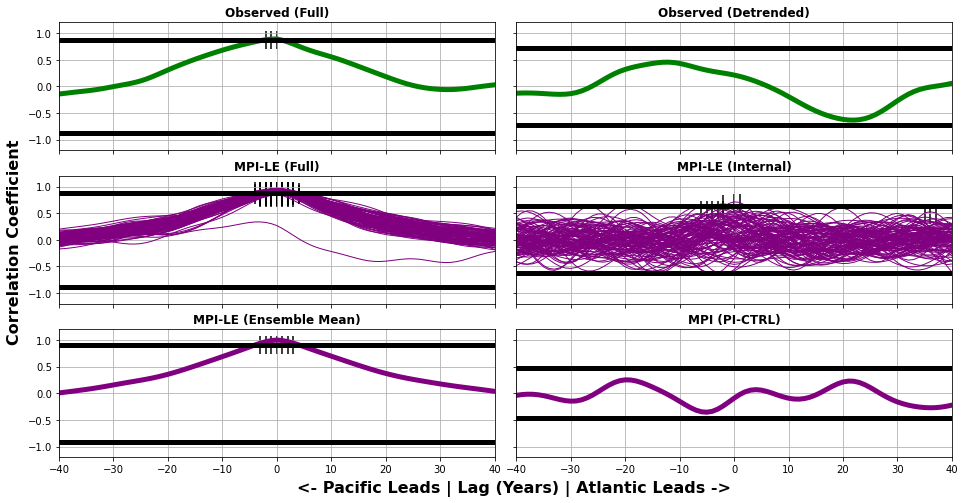

In [45]:
x, y = 2, 3

fig, ax = plt.subplots(nrows=y, ncols=x, figsize=(16,8), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.05, hspace=.2)

lags = obs_pc1_pc1_xcorrs[0].lag.data

xcorrs = [[obs_pc1_pc1_xcorrs, obsdt_pc1_pc1_xcorrs],
          [mpi_full_xcorrs,    mpi_int_xcorrs],
          [mpi_em_xcorrs,      mpi_pi_xcorrs]]

sts    = [[obs_pc1_pc1_sts, obsdt_pc1_pc1_sts],
          [mpi_full_sts,    mpi_int_sts],
          [mpi_em_sts,       mpi_pi_sts]]

colors  = ['green', 'purple', 'purple']

titles = [['Observed (Full)',               'Observed (Detrended)'],
          ['MPI-LE (Full)',                 'MPI-LE (Internal)'],
          ['MPI-LE (Ensemble Mean)',        'MPI (PI-CTRL)']]

count1 = 0
count2 = 0

for i in np.arange(y):
    for j in np.arange(x):
        if (i == 1):
            for k in np.arange(xcorrs[i][j].shape[0]):
                ax[i][j].plot(lags, xcorrs[i][j][k,:], color=colors[i], linewidth=1, alpha=1)
                idx = np.where(np.abs(xcorrs[i][j][k,:]) > sts[i][j][0,k])
                count1 = count1 + np.size(idx)
                if (np.size(idx) > 0):
                    count2 = count2 + 1
                ax[i][j].scatter(lags[idx], np.asarray(sts[i][j][:,k])[idx], marker='|', color='black', s=300)
                
            ax[i][j].plot(lags, np.mean(sts[i][j], axis=1), color='black', linewidth=5)
            ax[i][j].plot(lags, [-x for x in np.mean(sts[i][j], axis=1)], color='black', linewidth=5)
            
            print("Points: ", count1, "\nPeaks: ", count2)
            count1 = count2 = 0

        else:
            ax[i][j].plot(lags, xcorrs[i][j][0,:], color=colors[i], linewidth=5)
            idx = np.where(np.abs(xcorrs[i][j][0,:]) > sts[i][j][0])
            ax[i][j].scatter(lags[idx], np.asarray(sts[i][j][0,:])[idx], marker='|', color='black', s=300)
            ax[i][j].plot(lags, sts[i][j][0,:], color='black', linewidth=5)
            ax[i][j].plot(lags, [-x for x in sts[i][j][0,:]], color='black', linewidth=5)
        
        ax[i][j].grid()
        ax[i][j].set_xlim([-40,40])
        ax[i][j].set_ylim([-1.2,1.2])
        ax[i][j].set_title(titles[i][j], fontsize=12, fontweight='bold')

fig.text(0.52, 0.065, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.08, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/mpi_na1_np1_xcorrs.pdf', bbox_inches='tight')
 

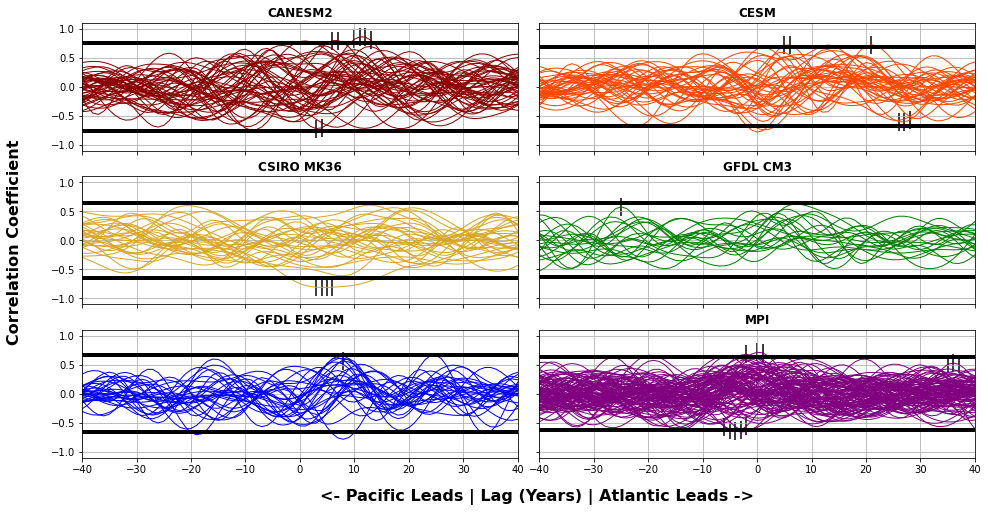

In [46]:
y, x = 2, 3

fig, axs = plt.subplots(nrows=x, ncols=y, figsize=(16,8), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.05, hspace=.2)

xcorrs = [canesm2_int_xcorrs, cesm_int_xcorrs, csiro_int_xcorrs, gfdlcm3_int_xcorrs, gfdlesm2m_int_xcorrs, mpi_int_xcorrs]
sts    = [canesm2_int_sts,    cesm_int_sts,    csiro_int_sts,    gfdlcm3_int_sts,    gfdlesm2m_int_sts,    mpi_int_sts]
m_strs = ['CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI']
colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']

lags = obs_pc1_pc1_xcorrs[0].lag.data

for ax, xcorr, st, m_str, color in zip(axs.flatten(), xcorrs, sts, m_strs, colors):
    for i in xcorr.member.data:
        ax.plot(lags, xcorr[i,:], color=color, linewidth=1)
        idx1 = np.where(xcorr[i,:] >  st[0,i])
        idx2 = np.where(xcorr[i,:] < -st[0,i])
        ax.scatter(lags[idx1], np.asarray(xcorr[i])[idx1], marker='|', color='black', s=300)
        ax.scatter(lags[idx2], np.asarray(xcorr[i])[idx2], marker='|', color='black', s=300)
        
    ax.plot(lags, st.mean(dim='member'), color='black', linewidth=4)
    ax.plot(lags, [-x for x in st.mean(dim='member')], color='black', linewidth=4)
    ax.grid()
    ax.set_xlim([-40,40])
    ax.set_ylim([-1.1,1.1])
    ax.set_title(m_str, fontsize=12, fontweight='bold')

fig.text(0.52, 0.05, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.06, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/all_na1_np1_int_xcorrs.pdf', bbox_inches='tight')
 

In [47]:
for i in csiro_full_xcorrs.member.data:
    if (csiro_full_xcorrs.sel(member=i,lag=0) < 0):
        csiro_full_xcorrs[i,:] = -csiro_full_xcorrs[i,:]
        
for i in cesm_full_xcorrs.member.data:
    if (cesm_full_xcorrs.sel(member=i,lag=0) < 0):
        cesm_full_xcorrs[i,:] = -cesm_full_xcorrs[i,:]

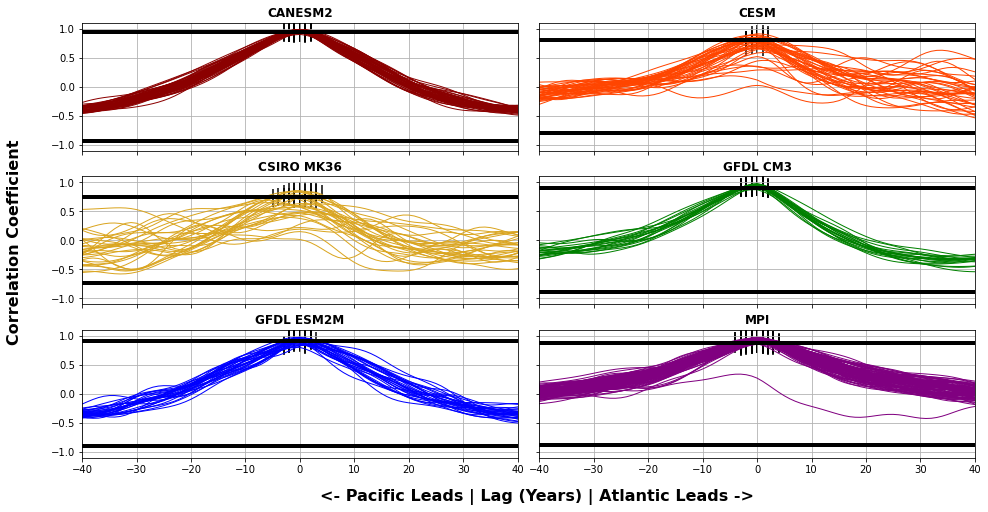

In [48]:
y, x = 2, 3

fig, axs = plt.subplots(nrows=x, ncols=y, figsize=(16,8), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.05, hspace=.2)

xcorrs = [canesm2_full_xcorrs, cesm_full_xcorrs, csiro_full_xcorrs, gfdlcm3_full_xcorrs, gfdlesm2m_full_xcorrs, mpi_full_xcorrs]
sts    = [canesm2_full_sts,    cesm_full_sts,    csiro_full_sts,    gfdlcm3_full_sts,    gfdlesm2m_full_sts,    mpi_full_sts]
m_strs = ['CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI']
colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']

lags = obs_pc1_pc1_xcorrs[0].lag.data

for ax, xcorr, st, m_str, color in zip(axs.flatten(), xcorrs, sts, m_strs, colors):
    for i in xcorr.member.data:
        ax.plot(lags, xcorr[i,:], color=color, linewidth=1)
        idx1 = np.where(xcorr[i,:] >  st[0,i])
        idx2 = np.where(xcorr[i,:] < -st[0,i])
        ax.scatter(lags[idx1], np.asarray(xcorr[i])[idx1], marker='|', color='black', s=300)
        ax.scatter(lags[idx2], np.asarray(xcorr[i])[idx2], marker='|', color='black', s=300)
        
    ax.plot(lags, st.mean(dim='member'), color='black', linewidth=4)
    ax.plot(lags, [-x for x in st.mean(dim='member')], color='black', linewidth=4)
    ax.grid()
    ax.set_xlim([-40,40])
    ax.set_ylim([-1.1,1.1])
    ax.set_title(m_str, fontsize=12, fontweight='bold')

fig.text(0.52, 0.05, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.06, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/all_na1_np1_full_xcorrs.pdf', bbox_inches='tight')
 

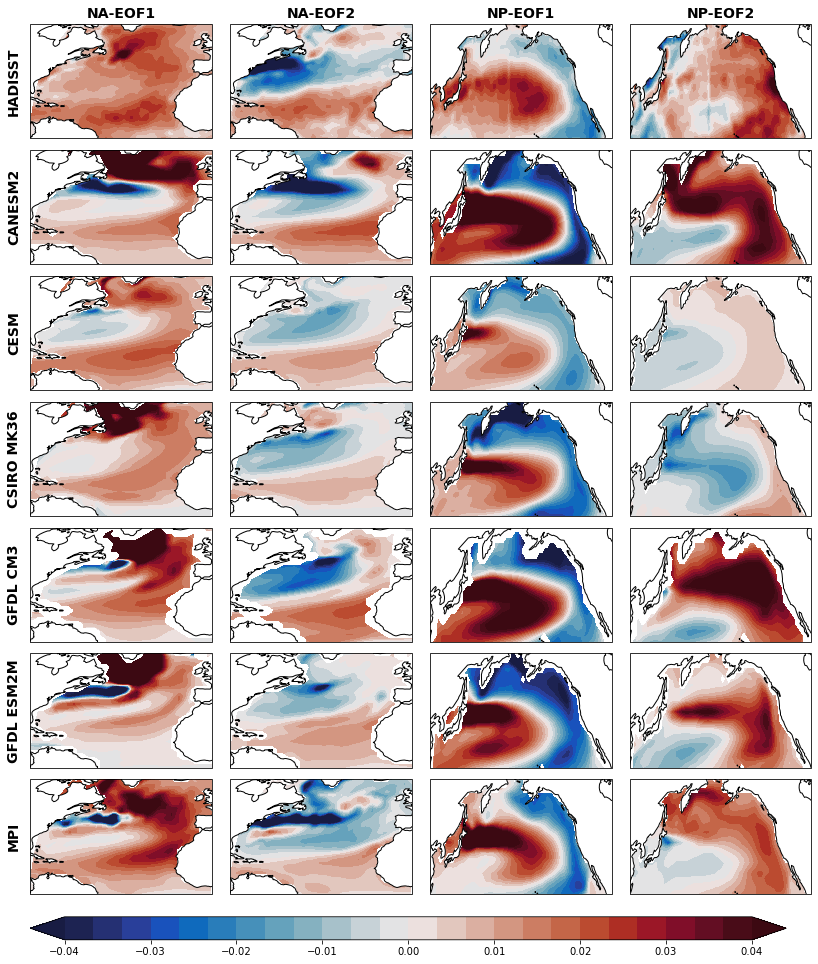

In [49]:
int_cm_natl_eof1s = [canesm2_cm_natl_eof[0,0,:,:], cesm_cm_natl_eof[0,0,:,:], csiro_cm_natl_eof[0,0,:,:], gfdlcm3_cm_natl_eof[0,0,:,:], gfdlesm2m_cm_natl_eof[0,0,:,:], mpi_cm_natl_eof[0,0,:,:]]
int_cm_natl_eof2s = [canesm2_cm_natl_eof[0,1,:,:], cesm_cm_natl_eof[0,1,:,:], csiro_cm_natl_eof[0,1,:,:], gfdlcm3_cm_natl_eof[0,1,:,:], gfdlesm2m_cm_natl_eof[0,1,:,:], mpi_cm_natl_eof[0,1,:,:]]
int_cm_npac_eof1s = [canesm2_cm_npac_eof[0,0,:,:], cesm_cm_npac_eof[0,0,:,:], csiro_cm_npac_eof[0,0,:,:], gfdlcm3_cm_npac_eof[0,0,:,:], gfdlesm2m_cm_npac_eof[0,0,:,:], mpi_cm_npac_eof[0,0,:,:]]
int_cm_npac_eof2s = [canesm2_cm_npac_eof[0,1,:,:], cesm_cm_npac_eof[0,1,:,:], csiro_cm_npac_eof[0,1,:,:], gfdlcm3_cm_npac_eof[0,1,:,:], gfdlesm2m_cm_npac_eof[0,1,:,:], mpi_cm_npac_eof[0,1,:,:]]

int_cm_eofs = [int_cm_natl_eof1s, int_cm_natl_eof2s, int_cm_npac_eof1s, int_cm_npac_eof2s]

sp = [obsdt_natl_eof[0,0,:,:], obsdt_natl_eof[0,1,:,:], obsdt_npac_eof[0,0,:,:], obsdt_npac_eof[0,1,:,:]]
cl = [0,0,180,180]
yl = ['NA-EOF1', 'NA-EOF2', 'NP-EOF1', 'NP-EOF2']
xl = ['HADISST', 'CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI']

gs =  gridspec.GridSpec(7,4)

levels = np.linspace(-.04,.04,25)
feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical', scale='110m', edgecolor='black', facecolor='white')
fig = plt.figure(figsize=(14,16))
plt.subplots_adjust(wspace=.1, hspace=.1)

for i in np.arange(4):
    ax0 = plt.subplot(gs[i], projection=ccrs.Robinson(central_longitude=cl[i]))
    cbar = ax0.contourf(sp[i].lon, sp[i].lat,  sp[i], levels=levels, extend='both', cmap=cmo.balance, transform=ccrs.PlateCarree())
    ax0.add_feature(feature)
    ax0.set_aspect('auto')
    ax0.set_title(yl[i], fontsize=14, fontweight='bold')
    
    if (i == 0):
        ax0.text(-0.05, 0.50, xl[0], va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', transform=ax0.transAxes, fontsize=14, fontweight='bold')

    for j in np.arange(6):
        ax0 = plt.subplot(gs[4*(j+1)+i], projection=ccrs.Robinson(central_longitude=cl[i]))
        ax0.contourf(int_cm_eofs[i][j].lon, int_cm_eofs[i][j].lat,  int_cm_eofs[i][j], levels=levels, extend='both', cmap=cmo.balance, transform=ccrs.PlateCarree())
        ax0.add_feature(feature)
        ax0.set_aspect('auto')
        
        if (i == 0):
            ax0.text(-0.05, 0.50, xl[j+1], va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', transform=ax0.transAxes, fontsize=14, fontweight='bold')

cax = fig.add_axes([0.125, 0.085, 0.75, 0.02])
cb = fig.colorbar(cbar, orientation='horizontal', cax=cax)

plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/mmle_all_compmean_spat.pdf', bbox_inches='tight')

Significant full:  189
Significant internal:  13


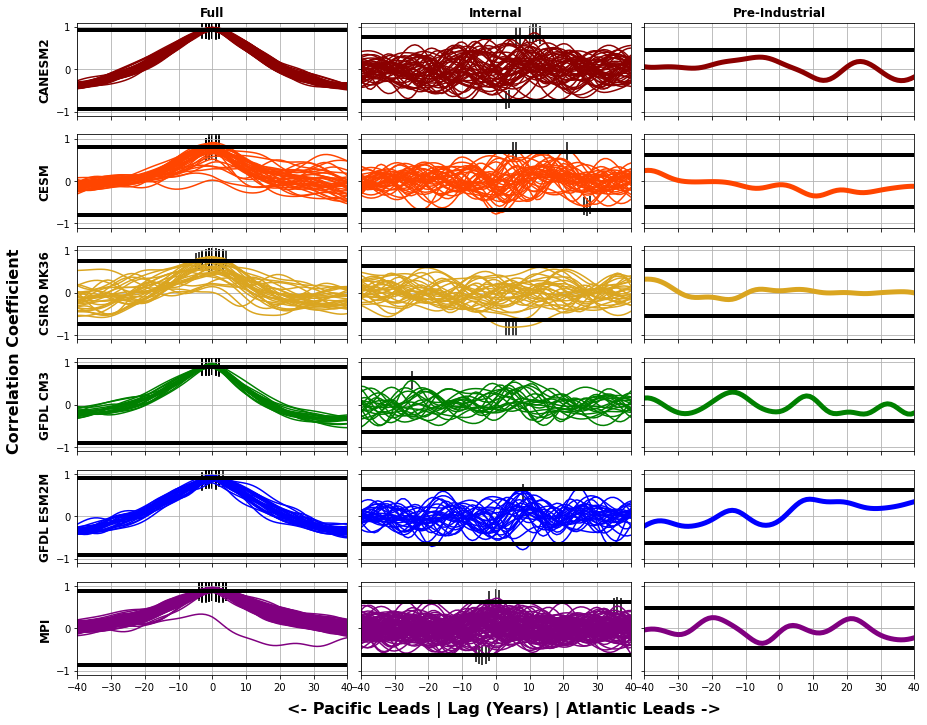

In [50]:
y, x = 3, 6

fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(15,12), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.05, hspace=.2)

fxcorrs = [canesm2_full_xcorrs, cesm_full_xcorrs, csiro_full_xcorrs, gfdlcm3_full_xcorrs, gfdlesm2m_full_xcorrs, mpi_full_xcorrs]
fsts    = [canesm2_full_sts,    cesm_full_sts,    csiro_full_sts,    gfdlcm3_full_sts,    gfdlesm2m_full_sts,    mpi_full_sts]
ixcorrs = [canesm2_int_xcorrs, cesm_int_xcorrs, csiro_int_xcorrs, gfdlcm3_int_xcorrs, gfdlesm2m_int_xcorrs, mpi_int_xcorrs]
ists    = [canesm2_int_sts,    cesm_int_sts,    csiro_int_sts,    gfdlcm3_int_sts,    gfdlesm2m_int_sts,    mpi_int_sts]
pxcorrs = [canesm2_pi_xcorrs, cesm_pi_xcorrs, csiro_pi_xcorrs, gfdlcm3_pi_xcorrs, gfdlesm2m_pi_xcorrs, mpi_pi_xcorrs]
psts    = [canesm2_pi_sts,    cesm_pi_sts,    csiro_pi_sts,    gfdlcm3_pi_sts,    gfdlesm2m_pi_sts,    mpi_pi_sts]
m_strs = ['CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI']
colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']

lags = canesm2_pi_xcorrs[0].lag.data

fcount = 0
icount = 0

for fxcorr, fst, ixcorr, ist, pxcorr, pst, m_str, color, n in zip(fxcorrs, fsts, ixcorrs, ists, pxcorrs, psts, m_strs, colors, np.arange(6)):
    for i in fxcorr.member.data:
        ax[n][0].plot(lags, fxcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(fxcorr[i,:] >  fst[0,i])
        idx2 = np.where(fxcorr[i,:] < -fst[0,i])
        ax[n][0].scatter(lags[idx1], np.asarray(fxcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][0].scatter(lags[idx2], np.asarray(fxcorr[i])[idx2], marker='|', color='black', s=300)
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            fcount = fcount + 1
    ax[n][0].plot(lags, fst.mean(dim='member'), color='black', linewidth=4)
    ax[n][0].plot(lags, [-x for x in fst.mean(dim='member')], color='black', linewidth=4)
        
    for i in ixcorr.member.data:
        ax[n][1].plot(lags, ixcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(ixcorr[i,:] >  ist[0,i])
        idx2 = np.where(ixcorr[i,:] < -ist[0,i])
        ax[n][1].scatter(lags[idx1], np.asarray(ixcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][1].scatter(lags[idx2], np.asarray(ixcorr[i])[idx2], marker='|', color='black', s=300)        
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            icount = icount + 1
    ax[n][1].plot(lags, ist.mean(dim='member'), color='black', linewidth=4)
    ax[n][1].plot(lags, [-x for x in ist.mean(dim='member')], color='black', linewidth=4)
      
    ax[n][2].plot(lags, pxcorr[0,:], color=color, linewidth=5)
    idx1 = np.where(pxcorr[0,:] >  np.asarray(pst[0,:]))
    idx2 = np.where(pxcorr[0,:] < -np.asarray(pst[0,:]))
    ax[n][2].scatter(lags[idx1], np.asarray(pxcorr[0,:])[idx1], marker='|', color='black', s=300)
    ax[n][2].scatter(lags[idx2], np.asarray(pxcorr[0,:])[idx2], marker='|', color='black', s=300)
    ax[n][2].plot(lags, pst[0,:], color='black', linewidth=4)
    ax[n][2].plot(lags, [-x for x in pst[0,:]], color='black', linewidth=4)
 
    for i in np.arange(3):
        ax[n][i].grid()
        ax[n][i].set_xlim([-40,40])
        ax[n][i].set_ylim([-1.1,1.1])
    
    ax[n][0].set_ylabel(m_str, fontsize=12, fontweight='bold')
    
    ax[0][0].set_title('Full', fontsize=12, fontweight='bold')
    ax[0][1].set_title('Internal', fontsize=12, fontweight='bold')
    ax[0][2].set_title('Pre-Industrial', fontsize=12, fontweight='bold')

fig.text(0.52, 0.08, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.06, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

print('Significant full: ', fcount)
print('Significant internal: ', icount)
plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/all_na1_np1_xcorrs_18_panel.pdf', bbox_inches='tight')
 

In [51]:
canesm2_full_na1_np2_xcorrs = calc_xcorrs(canesm2_full_natl_pc_c[:,:,0], canesm2_full_npac_pc_c[:,:,1])
canesm2_int_na1_np2_xcorrs  = calc_xcorrs(canesm2_int_natl_pc_c[:,:,0],   canesm2_int_npac_pc_c[:,:,1])
canesm2_pi_na1_np2_xcorrs   = calc_xcorrs(canesm2_pi_natl_pc[:,:,0],     canesm2_pi_npac_pc[:,:,1])

cesm_full_na1_np2_xcorrs = calc_xcorrs(cesm_full_natl_pc_c[:,:,0], cesm_full_npac_pc_c[:,:,1])
cesm_int_na1_np2_xcorrs  = calc_xcorrs(cesm_int_natl_pc_c[:,:,0],   cesm_int_npac_pc_c[:,:,1])
cesm_pi_na1_np2_xcorrs   = calc_xcorrs(cesm_pi_natl_pc[:,:,0],     cesm_pi_npac_pc[:,:,1])

csiro_full_na1_np2_xcorrs = calc_xcorrs(csiro_full_natl_pc_c[:,:,0], csiro_full_npac_pc_c[:,:,1])
csiro_int_na1_np2_xcorrs  = calc_xcorrs(csiro_int_natl_pc_c[:,:,0],   csiro_int_npac_pc_c[:,:,1])
csiro_pi_na1_np2_xcorrs   = calc_xcorrs(csiro_pi_natl_pc[:,:,0],     csiro_pi_npac_pc[:,:,1])

gfdlcm3_full_na1_np2_xcorrs = calc_xcorrs(gfdlcm3_full_natl_pc_c[:,:,0], gfdlcm3_full_npac_pc_c[:,:,1])
gfdlcm3_int_na1_np2_xcorrs  = calc_xcorrs(gfdlcm3_int_natl_pc_c[:,:,0],   gfdlcm3_int_npac_pc_c[:,:,1])
gfdlcm3_pi_na1_np2_xcorrs   = calc_xcorrs(gfdlcm3_pi_natl_pc[:,:,0],     gfdlcm3_pi_npac_pc[:,:,1])

gfdlesm2m_full_na1_np2_xcorrs = calc_xcorrs(gfdlesm2m_full_natl_pc_c[:,:,0], gfdlesm2m_full_npac_pc_c[:,:,1])
gfdlesm2m_int_na1_np2_xcorrs  = calc_xcorrs(gfdlesm2m_int_natl_pc_c[:,:,0],   gfdlesm2m_int_npac_pc_c[:,:,1])
gfdlesm2m_pi_na1_np2_xcorrs   = calc_xcorrs(gfdlesm2m_pi_natl_pc[:,:,0],     gfdlesm2m_pi_npac_pc[:,:,1])

mpi_full_na1_np2_xcorrs = calc_xcorrs(mpi_full_natl_pc_c[:,:,0], mpi_full_npac_pc_c[:,:,1])
mpi_int_na1_np2_xcorrs  = calc_xcorrs(mpi_int_natl_pc_c[:,:,0],   mpi_int_npac_pc_c[:,:,1])
mpi_pi_na1_np2_xcorrs   = calc_xcorrs(mpi_pi_natl_pc[:,:,0],     mpi_pi_npac_pc[:,:,1])

In [52]:
canesm2_full_na2_np1_xcorrs = calc_xcorrs(canesm2_full_natl_pc_c[:,:,1], canesm2_full_npac_pc_c[:,:,0])
canesm2_int_na2_np1_xcorrs  = calc_xcorrs(canesm2_int_natl_pc_c[:,:,1],   canesm2_int_npac_pc_c[:,:,0])
canesm2_pi_na2_np1_xcorrs   = calc_xcorrs(canesm2_pi_natl_pc[:,:,1],     canesm2_pi_npac_pc[:,:,0])

cesm_full_na2_np1_xcorrs = calc_xcorrs(cesm_full_natl_pc_c[:,:,1], cesm_full_npac_pc_c[:,:,0])
cesm_int_na2_np1_xcorrs  = calc_xcorrs(cesm_int_natl_pc_c[:,:,1],   cesm_int_npac_pc_c[:,:,0])
cesm_pi_na2_np1_xcorrs   = calc_xcorrs(cesm_pi_natl_pc[:,:,1],     cesm_pi_npac_pc[:,:,0])

csiro_full_na2_np1_xcorrs = calc_xcorrs(csiro_full_natl_pc_c[:,:,1], csiro_full_npac_pc_c[:,:,0])
csiro_int_na2_np1_xcorrs  = calc_xcorrs(csiro_int_natl_pc_c[:,:,1],   csiro_int_npac_pc_c[:,:,0])
csiro_pi_na2_np1_xcorrs   = calc_xcorrs(csiro_pi_natl_pc[:,:,1],     csiro_pi_npac_pc[:,:,0])

gfdlcm3_full_na2_np1_xcorrs = calc_xcorrs(gfdlcm3_full_natl_pc_c[:,:,1], gfdlcm3_full_npac_pc_c[:,:,0])
gfdlcm3_int_na2_np1_xcorrs  = calc_xcorrs(gfdlcm3_int_natl_pc_c[:,:,1],   gfdlcm3_int_npac_pc_c[:,:,0])
gfdlcm3_pi_na2_np1_xcorrs   = calc_xcorrs(gfdlcm3_pi_natl_pc[:,:,1],     gfdlcm3_pi_npac_pc[:,:,0])

gfdlesm2m_full_na2_np1_xcorrs = calc_xcorrs(gfdlesm2m_full_natl_pc_c[:,:,1], gfdlesm2m_full_npac_pc_c[:,:,0])
gfdlesm2m_int_na2_np1_xcorrs  = calc_xcorrs(gfdlesm2m_int_natl_pc_c[:,:,1],   gfdlesm2m_int_npac_pc_c[:,:,0])
gfdlesm2m_pi_na2_np1_xcorrs   = calc_xcorrs(gfdlesm2m_pi_natl_pc[:,:,1],     gfdlesm2m_pi_npac_pc[:,:,0])

mpi_full_na2_np1_xcorrs = calc_xcorrs(mpi_full_natl_pc_c[:,:,1], mpi_full_npac_pc_c[:,:,0])
mpi_int_na2_np1_xcorrs  = calc_xcorrs(mpi_int_natl_pc_c[:,:,1],   mpi_int_npac_pc_c[:,:,0])
mpi_pi_na2_np1_xcorrs   = calc_xcorrs(mpi_pi_natl_pc[:,:,1],     mpi_pi_npac_pc[:,:,0])

In [53]:
canesm2_full_na2_np2_xcorrs = calc_xcorrs(canesm2_full_natl_pc_c[:,:,1], canesm2_full_npac_pc_c[:,:,1])
canesm2_int_na2_np2_xcorrs  = calc_xcorrs(canesm2_int_natl_pc_c[:,:,1],   canesm2_int_npac_pc_c[:,:,1])
canesm2_pi_na2_np2_xcorrs   = calc_xcorrs(canesm2_pi_natl_pc[:,:,1],     canesm2_pi_npac_pc[:,:,1])

cesm_full_na2_np2_xcorrs = calc_xcorrs(cesm_full_natl_pc_c[:,:,1], cesm_full_npac_pc_c[:,:,1])
cesm_int_na2_np2_xcorrs  = calc_xcorrs(cesm_int_natl_pc_c[:,:,1],   cesm_int_npac_pc_c[:,:,1])
cesm_pi_na2_np2_xcorrs   = calc_xcorrs(cesm_pi_natl_pc[:,:,1],     cesm_pi_npac_pc[:,:,1])

csiro_full_na2_np2_xcorrs = calc_xcorrs(csiro_full_natl_pc_c[:,:,1], csiro_full_npac_pc_c[:,:,1])
csiro_int_na2_np2_xcorrs  = calc_xcorrs(csiro_int_natl_pc_c[:,:,1],   csiro_int_npac_pc_c[:,:,1])
csiro_pi_na2_np2_xcorrs   = calc_xcorrs(csiro_pi_natl_pc[:,:,1],     csiro_pi_npac_pc[:,:,1])

gfdlcm3_full_na2_np2_xcorrs = calc_xcorrs(gfdlcm3_full_natl_pc_c[:,:,1], gfdlcm3_full_npac_pc_c[:,:,1])
gfdlcm3_int_na2_np2_xcorrs  = calc_xcorrs(gfdlcm3_int_natl_pc_c[:,:,1],   gfdlcm3_int_npac_pc_c[:,:,1])
gfdlcm3_pi_na2_np2_xcorrs   = calc_xcorrs(gfdlcm3_pi_natl_pc[:,:,1],     gfdlcm3_pi_npac_pc[:,:,1])

gfdlesm2m_full_na2_np2_xcorrs = calc_xcorrs(gfdlesm2m_full_natl_pc_c[:,:,1], gfdlesm2m_full_npac_pc_c[:,:,1])
gfdlesm2m_int_na2_np2_xcorrs  = calc_xcorrs(gfdlesm2m_int_natl_pc_c[:,:,1],   gfdlesm2m_int_npac_pc_c[:,:,1])
gfdlesm2m_pi_na2_np2_xcorrs   = calc_xcorrs(gfdlesm2m_pi_natl_pc[:,:,1],     gfdlesm2m_pi_npac_pc[:,:,1])

mpi_full_na2_np2_xcorrs = calc_xcorrs(mpi_full_natl_pc_c[:,:,1], mpi_full_npac_pc_c[:,:,1])
mpi_int_na2_np2_xcorrs  = calc_xcorrs(mpi_int_natl_pc_c[:,:,1],   mpi_int_npac_pc_c[:,:,1])
mpi_pi_na2_np2_xcorrs   = calc_xcorrs(mpi_pi_natl_pc[:,:,1],     mpi_pi_npac_pc[:,:,1])

In [66]:
canesm2_na1_np2_full_sts   = load_mmlea_sts('canesm2',   'na1_np2_full')
cesm_na1_np2_full_sts      = load_mmlea_sts('cesm',      'na1_np2_full')
csiro_na1_np2_full_sts     = load_mmlea_sts('csiro',     'na1_np2_full')
gfdlcm3_na1_np2_full_sts   = load_mmlea_sts('gfdlcm3',   'na1_np2_full')
gfdlesm2m_na1_np2_full_sts = load_mmlea_sts('gfdlesm2m', 'na1_np2_full')
mpi_na1_np2_full_sts       = load_mmlea_sts('mpi',       'na1_np2_full')

canesm2_na1_np2_int_sts   = load_mmlea_sts('canesm2',   'na1_np2_int')
cesm_na1_np2_int_sts      = load_mmlea_sts('cesm',      'na1_np2_int')
csiro_na1_np2_int_sts     = load_mmlea_sts('csiro',     'na1_np2_int')
gfdlcm3_na1_np2_int_sts   = load_mmlea_sts('gfdlcm3',   'na1_np2_int')
gfdlesm2m_na1_np2_int_sts = load_mmlea_sts('gfdlesm2m', 'na1_np2_int')
mpi_na1_np2_int_sts       = load_mmlea_sts('mpi',       'na1_np2_int')

In [67]:
canesm2_na2_np1_full_sts   = load_mmlea_sts('canesm2',   'na2_np1_full')
cesm_na2_np1_full_sts      = load_mmlea_sts('cesm',      'na2_np1_full')
csiro_na2_np1_full_sts     = load_mmlea_sts('csiro',     'na2_np1_full')
gfdlcm3_na2_np1_full_sts   = load_mmlea_sts('gfdlcm3',   'na2_np1_full')
gfdlesm2m_na2_np1_full_sts = load_mmlea_sts('gfdlesm2m', 'na2_np1_full')
mpi_na2_np1_full_sts       = load_mmlea_sts('mpi',       'na2_np1_full')

canesm2_na2_np1_int_sts   = load_mmlea_sts('canesm2',   'na2_np1_int')
cesm_na2_np1_int_sts      = load_mmlea_sts('cesm',      'na2_np1_int')
csiro_na2_np1_int_sts     = load_mmlea_sts('csiro',     'na2_np1_int')
gfdlcm3_na2_np1_int_sts   = load_mmlea_sts('gfdlcm3',   'na2_np1_int')
gfdlesm2m_na2_np1_int_sts = load_mmlea_sts('gfdlesm2m', 'na2_np1_int')
mpi_na2_np1_int_sts       = load_mmlea_sts('mpi',       'na2_np1_int')

In [68]:
canesm2_na2_np2_full_sts   = load_mmlea_sts('canesm2',   'na2_np2_full')
cesm_na2_np2_full_sts      = load_mmlea_sts('cesm',      'na2_np2_full')
csiro_na2_np2_full_sts     = load_mmlea_sts('csiro',     'na2_np2_full')
gfdlcm3_na2_np2_full_sts   = load_mmlea_sts('gfdlcm3',   'na2_np2_full')
gfdlesm2m_na2_np2_full_sts = load_mmlea_sts('gfdlesm2m', 'na2_np2_full')
mpi_na2_np2_full_sts       = load_mmlea_sts('mpi',       'na2_np2_full')

canesm2_na2_np2_int_sts   = load_mmlea_sts('canesm2',   'na2_np2_int')
cesm_na2_np2_int_sts      = load_mmlea_sts('cesm',      'na2_np2_int')
csiro_na2_np2_int_sts     = load_mmlea_sts('csiro',     'na2_np2_int')
gfdlcm3_na2_np2_int_sts   = load_mmlea_sts('gfdlcm3',   'na2_np2_int')
gfdlesm2m_na2_np2_int_sts = load_mmlea_sts('gfdlesm2m', 'na2_np2_int')
mpi_na2_np2_int_sts       = load_mmlea_sts('mpi',       'na2_np2_int')

In [57]:
canesm2_na1_np2_pi_sts   = calc_sig_thres(canesm2_pi_natl_pc[0,:,0],   canesm2_pi_npac_pc[0,:,1],   thres=90)
cesm_na1_np2_pi_sts      = calc_sig_thres(cesm_pi_natl_pc[0,:,0],      cesm_pi_npac_pc[0,:,1],      thres=90)
csiro_na1_np2_pi_sts     = calc_sig_thres(csiro_pi_natl_pc[0,:,0],     csiro_pi_npac_pc[0,:,1],     thres=90)
gfdlesm2m_na1_np2_pi_sts = calc_sig_thres(gfdlesm2m_pi_natl_pc[0,:,0], gfdlesm2m_pi_npac_pc[0,:,1], thres=90)
gfdlcm3_na1_np2_pi_sts   = calc_sig_thres(gfdlcm3_pi_natl_pc[0,:,0],   gfdlcm3_pi_npac_pc[0,:,1],   thres=90)
mpi_na1_np2_pi_sts       = calc_sig_thres(mpi_pi_natl_pc[0,:,0],       mpi_pi_npac_pc[0,:,1],       thres=90)

canesm2_na2_np1_pi_sts   = calc_sig_thres(canesm2_pi_natl_pc[0,:,1],   canesm2_pi_npac_pc[0,:,0],   thres=90)
cesm_na2_np1_pi_sts      = calc_sig_thres(cesm_pi_natl_pc[0,:,1],      cesm_pi_npac_pc[0,:,0],      thres=90)
csiro_na2_np1_pi_sts     = calc_sig_thres(csiro_pi_natl_pc[0,:,1],     csiro_pi_npac_pc[0,:,0],     thres=90)
gfdlesm2m_na2_np1_pi_sts = calc_sig_thres(gfdlesm2m_pi_natl_pc[0,:,1], gfdlesm2m_pi_npac_pc[0,:,0], thres=90)
gfdlcm3_na2_np1_pi_sts   = calc_sig_thres(gfdlcm3_pi_natl_pc[0,:,1],   gfdlcm3_pi_npac_pc[0,:,0],   thres=90)
mpi_na2_np1_pi_sts       = calc_sig_thres(mpi_pi_natl_pc[0,:,1],       mpi_pi_npac_pc[0,:,0],       thres=90)

canesm2_na2_np2_pi_sts   = calc_sig_thres(canesm2_pi_natl_pc[0,:,1],   canesm2_pi_npac_pc[0,:,1],   thres=90)
cesm_na2_np2_pi_sts      = calc_sig_thres(cesm_pi_natl_pc[0,:,1],      cesm_pi_npac_pc[0,:,1],      thres=90)
csiro_na2_np2_pi_sts     = calc_sig_thres(csiro_pi_natl_pc[0,:,1],     csiro_pi_npac_pc[0,:,1],     thres=90)
gfdlesm2m_na2_np2_pi_sts = calc_sig_thres(gfdlesm2m_pi_natl_pc[0,:,1], gfdlesm2m_pi_npac_pc[0,:,1], thres=90)
gfdlcm3_na2_np2_pi_sts   = calc_sig_thres(gfdlcm3_pi_natl_pc[0,:,1],   gfdlcm3_pi_npac_pc[0,:,1],   thres=90)
mpi_na2_np2_pi_sts       = calc_sig_thres(mpi_pi_natl_pc[0,:,1],       mpi_pi_npac_pc[0,:,1],       thres=90)

Significant full:  9
Significant internal:  13


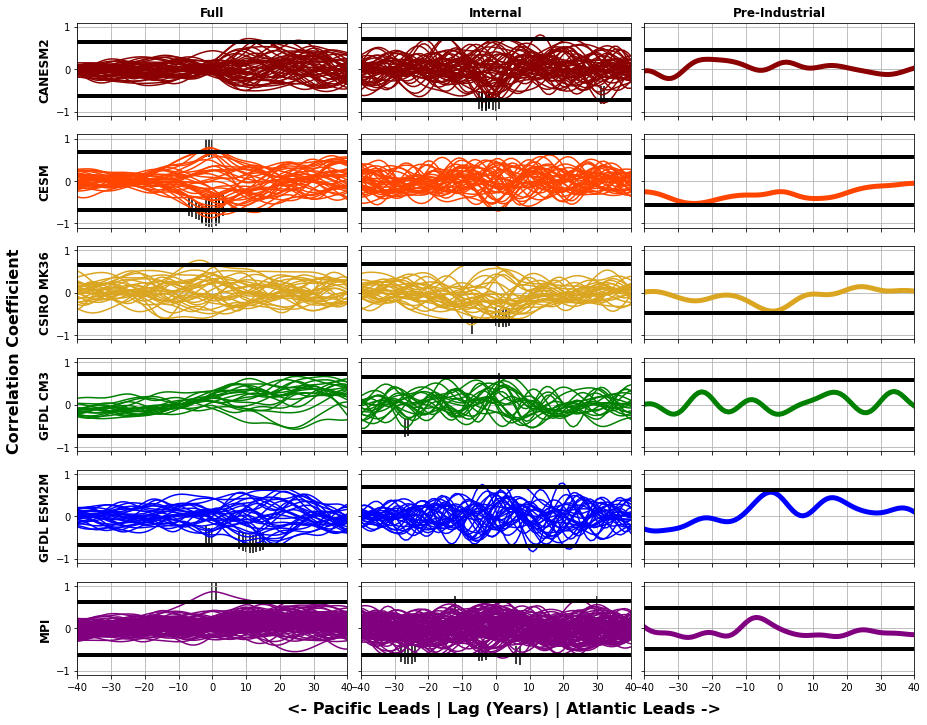

In [69]:
y, x = 3, 6

fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(15,12), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.05, hspace=.2)

fxcorrs = [canesm2_full_na1_np2_xcorrs, cesm_full_na1_np2_xcorrs, csiro_full_na1_np2_xcorrs, gfdlcm3_full_na1_np2_xcorrs, gfdlesm2m_full_na1_np2_xcorrs, mpi_full_na1_np2_xcorrs]
ixcorrs = [canesm2_int_na1_np2_xcorrs,  cesm_int_na1_np2_xcorrs,  csiro_int_na1_np2_xcorrs,  gfdlcm3_int_na1_np2_xcorrs,  gfdlesm2m_int_na1_np2_xcorrs,  mpi_int_na1_np2_xcorrs]
pxcorrs = [canesm2_pi_na1_np2_xcorrs,   cesm_pi_na1_np2_xcorrs,   csiro_pi_na1_np2_xcorrs,   gfdlcm3_pi_na1_np2_xcorrs,   gfdlesm2m_pi_na1_np2_xcorrs,   mpi_pi_na1_np2_xcorrs]

fsts    = [canesm2_na1_np2_full_sts,    cesm_na1_np2_full_sts,    csiro_na1_np2_full_sts,    gfdlcm3_na1_np2_full_sts,    gfdlesm2m_na1_np2_full_sts,    mpi_na1_np2_full_sts]
ists    = [canesm2_na1_np2_int_sts,     cesm_na1_np2_int_sts,     csiro_na1_np2_int_sts,     gfdlcm3_na1_np2_int_sts,     gfdlesm2m_na1_np2_int_sts,     mpi_na1_np2_int_sts]
psts    = [canesm2_na1_np2_pi_sts,      cesm_na1_np2_pi_sts,      csiro_na1_np2_pi_sts,      gfdlcm3_na1_np2_pi_sts,      gfdlesm2m_na1_np2_pi_sts,      mpi_na1_np2_pi_sts]

m_strs = ['CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI']
colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']

lags = canesm2_pi_na1_np2_xcorrs[0].lag.data

fcount = 0
icount = 0

for fxcorr, fst, ixcorr, ist, pxcorr, pst, m_str, color, n in zip(fxcorrs, fsts, ixcorrs, ists, pxcorrs, psts, m_strs, colors, np.arange(6)):
    for i in fxcorr.member.data:
        ax[n][0].plot(lags, fxcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(fxcorr[i,:] >  fst[0,i])
        idx2 = np.where(fxcorr[i,:] < -fst[0,i])
        ax[n][0].scatter(lags[idx1], np.asarray(fxcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][0].scatter(lags[idx2], np.asarray(fxcorr[i])[idx2], marker='|', color='black', s=300)
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            fcount = fcount + 1
    ax[n][0].plot(lags, fst.mean(dim='member'), color='black', linewidth=4)
    ax[n][0].plot(lags, [-x for x in fst.mean(dim='member')], color='black', linewidth=4)
        
    for i in ixcorr.member.data:
        ax[n][1].plot(lags, ixcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(ixcorr[i,:] >  ist[0,i])
        idx2 = np.where(ixcorr[i,:] < -ist[0,i])
        ax[n][1].scatter(lags[idx1], np.asarray(ixcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][1].scatter(lags[idx2], np.asarray(ixcorr[i])[idx2], marker='|', color='black', s=300)        
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            icount = icount + 1
    ax[n][1].plot(lags, ist.mean(dim='member'), color='black', linewidth=4)
    ax[n][1].plot(lags, [-x for x in ist.mean(dim='member')], color='black', linewidth=4)
      
    ax[n][2].plot(lags, pxcorr[0,:], color=color, linewidth=5)
    idx1 = np.where(pxcorr[0,:] >  np.asarray(pst[0,:]))
    idx2 = np.where(pxcorr[0,:] < -np.asarray(pst[0,:]))
    ax[n][2].scatter(lags[idx1], np.asarray(pxcorr[0,:])[idx1], marker='|', color='black', s=300)
    ax[n][2].scatter(lags[idx2], np.asarray(pxcorr[0,:])[idx2], marker='|', color='black', s=300)
    ax[n][2].plot(lags, pst[0,:], color='black', linewidth=4)
    ax[n][2].plot(lags, [-x for x in pst[0,:]], color='black', linewidth=4)
 
    for i in np.arange(3):
        ax[n][i].grid()
        ax[n][i].set_xlim([-40,40])
        ax[n][i].set_ylim([-1.1,1.1])
    
    ax[n][0].set_ylabel(m_str, fontsize=12, fontweight='bold')
    
    ax[0][0].set_title('Full', fontsize=12, fontweight='bold')
    ax[0][1].set_title('Internal', fontsize=12, fontweight='bold')
    ax[0][2].set_title('Pre-Industrial', fontsize=12, fontweight='bold')

fig.text(0.52, 0.08, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.06, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

print('Significant full: ', fcount)
print('Significant internal: ', icount)
plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/all_na1_np2_xcorrs_18_panel.pdf', bbox_inches='tight')
 

Significant full:  3
Significant internal:  18


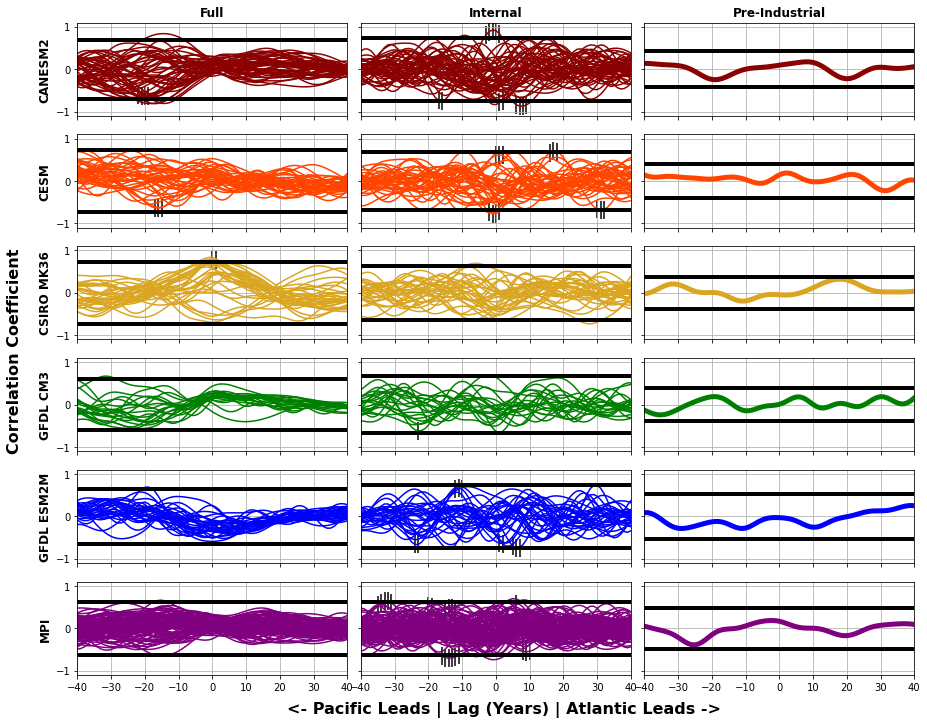

In [72]:
y, x = 3, 6

fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(15,12), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.05, hspace=.2)

fxcorrs = [canesm2_full_na2_np1_xcorrs, cesm_full_na2_np1_xcorrs, csiro_full_na2_np1_xcorrs, gfdlcm3_full_na2_np1_xcorrs, gfdlesm2m_full_na2_np1_xcorrs, mpi_full_na2_np1_xcorrs]
ixcorrs = [canesm2_int_na2_np1_xcorrs,  cesm_int_na2_np1_xcorrs,  csiro_int_na2_np1_xcorrs,  gfdlcm3_int_na2_np1_xcorrs,  gfdlesm2m_int_na2_np1_xcorrs,  mpi_int_na2_np1_xcorrs]
pxcorrs = [canesm2_pi_na2_np1_xcorrs,   cesm_pi_na2_np1_xcorrs,   csiro_pi_na2_np1_xcorrs,   gfdlcm3_pi_na2_np1_xcorrs,   gfdlesm2m_pi_na2_np1_xcorrs,   mpi_pi_na2_np1_xcorrs]

fsts    = [canesm2_na2_np1_full_sts,    cesm_na2_np1_full_sts,    csiro_na2_np1_full_sts,    gfdlcm3_na2_np1_full_sts,    gfdlesm2m_na2_np1_full_sts,    mpi_na2_np1_full_sts]
ists    = [canesm2_na2_np1_int_sts,     cesm_na2_np1_int_sts,     csiro_na2_np1_int_sts,     gfdlcm3_na2_np1_int_sts,     gfdlesm2m_na2_np1_int_sts,     mpi_na2_np1_int_sts]
psts    = [canesm2_na2_np1_pi_sts,      cesm_na2_np1_pi_sts,      csiro_na2_np1_pi_sts,      gfdlcm3_na2_np1_pi_sts,      gfdlesm2m_na2_np1_pi_sts,      mpi_na2_np1_pi_sts]

m_strs = ['CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI']
colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']

lags = canesm2_pi_na2_np1_xcorrs[0].lag.data

fcount = 0
icount = 0

for fxcorr, fst, ixcorr, ist, pxcorr, pst, m_str, color, n in zip(fxcorrs, fsts, ixcorrs, ists, pxcorrs, psts, m_strs, colors, np.arange(6)):
    for i in fxcorr.member.data:
        ax[n][0].plot(lags, fxcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(fxcorr[i,:] >  fst[0,i])
        idx2 = np.where(fxcorr[i,:] < -fst[0,i])
        ax[n][0].scatter(lags[idx1], np.asarray(fxcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][0].scatter(lags[idx2], np.asarray(fxcorr[i])[idx2], marker='|', color='black', s=300)
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            fcount = fcount + 1
    ax[n][0].plot(lags, fst.mean(dim='member'), color='black', linewidth=4)
    ax[n][0].plot(lags, [-x for x in fst.mean(dim='member')], color='black', linewidth=4)
        
    for i in ixcorr.member.data:
        ax[n][1].plot(lags, ixcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(ixcorr[i,:] >  ist[0,i])
        idx2 = np.where(ixcorr[i,:] < -ist[0,i])
        ax[n][1].scatter(lags[idx1], np.asarray(ixcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][1].scatter(lags[idx2], np.asarray(ixcorr[i])[idx2], marker='|', color='black', s=300)        
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            icount = icount + 1
    ax[n][1].plot(lags, ist.mean(dim='member'), color='black', linewidth=4)
    ax[n][1].plot(lags, [-x for x in ist.mean(dim='member')], color='black', linewidth=4)
      
    ax[n][2].plot(lags, pxcorr[0,:], color=color, linewidth=5)
    idx1 = np.where(pxcorr[0,:] >  np.asarray(pst[0,:]))
    idx2 = np.where(pxcorr[0,:] < -np.asarray(pst[0,:]))
    ax[n][2].scatter(lags[idx1], np.asarray(pxcorr[0,:])[idx1], marker='|', color='black', s=300)
    ax[n][2].scatter(lags[idx2], np.asarray(pxcorr[0,:])[idx2], marker='|', color='black', s=300)
    ax[n][2].plot(lags, pst[0,:], color='black', linewidth=4)
    ax[n][2].plot(lags, [-x for x in pst[0,:]], color='black', linewidth=4)
 
    for i in np.arange(3):
        ax[n][i].grid()
        ax[n][i].set_xlim([-40,40])
        ax[n][i].set_ylim([-1.1,1.1])
    
    ax[n][0].set_ylabel(m_str, fontsize=12, fontweight='bold')
    
    ax[0][0].set_title('Full', fontsize=12, fontweight='bold')
    ax[0][1].set_title('Internal', fontsize=12, fontweight='bold')
    ax[0][2].set_title('Pre-Industrial', fontsize=12, fontweight='bold')

fig.text(0.52, 0.08, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.06, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

print('Significant full: ', fcount)
print('Significant internal: ', icount)
plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/all_na2_np1_xcorrs_18_panel.pdf', bbox_inches='tight')
 

Significant full:  11
Significant internal:  9


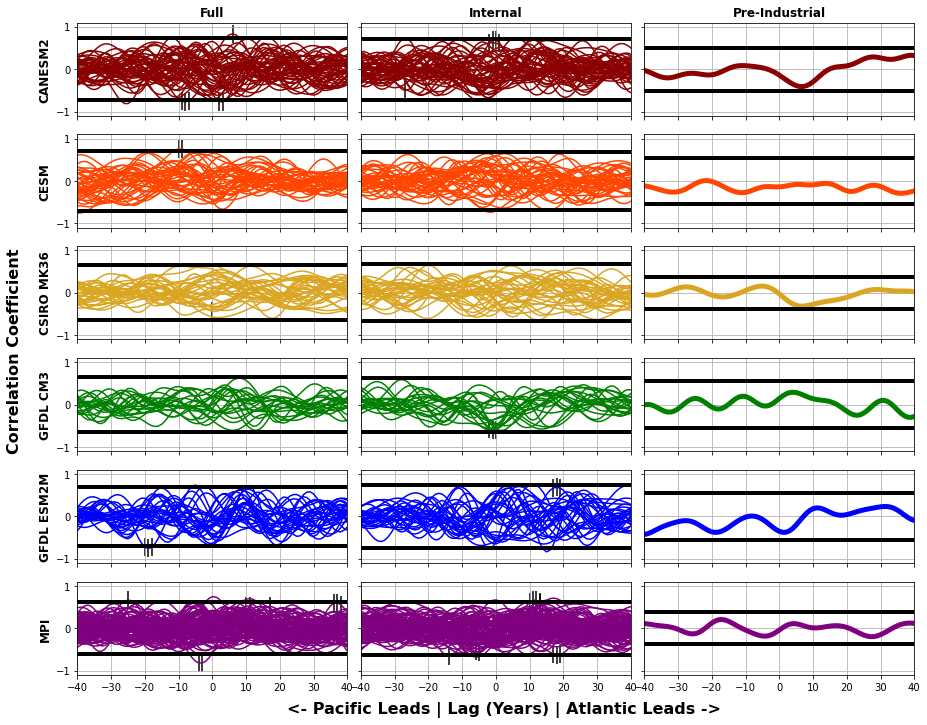

In [73]:
y, x = 3, 6

fig, ax = plt.subplots(nrows=x, ncols=y, figsize=(15,12), sharex=True, sharey=True, facecolor='white')
plt.subplots_adjust(wspace=.05, hspace=.2)

fxcorrs = [canesm2_full_na2_np2_xcorrs, cesm_full_na2_np2_xcorrs, csiro_full_na2_np2_xcorrs, gfdlcm3_full_na2_np2_xcorrs, gfdlesm2m_full_na2_np2_xcorrs, mpi_full_na2_np2_xcorrs]
ixcorrs = [canesm2_int_na2_np2_xcorrs,  cesm_int_na2_np2_xcorrs,  csiro_int_na2_np2_xcorrs,  gfdlcm3_int_na2_np2_xcorrs,  gfdlesm2m_int_na2_np2_xcorrs,  mpi_int_na2_np2_xcorrs]
pxcorrs = [canesm2_pi_na2_np2_xcorrs,   cesm_pi_na2_np2_xcorrs,   csiro_pi_na2_np2_xcorrs,   gfdlcm3_pi_na2_np2_xcorrs,   gfdlesm2m_pi_na2_np2_xcorrs,   mpi_pi_na2_np2_xcorrs]

fsts    = [canesm2_na2_np2_full_sts,    cesm_na2_np2_full_sts,    csiro_na2_np2_full_sts,    gfdlcm3_na2_np2_full_sts,    gfdlesm2m_na2_np2_full_sts,    mpi_na2_np2_full_sts]
ists    = [canesm2_na2_np2_int_sts,     cesm_na2_np2_int_sts,     csiro_na2_np2_int_sts,     gfdlcm3_na2_np2_int_sts,     gfdlesm2m_na2_np2_int_sts,     mpi_na2_np2_int_sts]
psts    = [canesm2_na2_np2_pi_sts,      cesm_na2_np2_pi_sts,      csiro_na2_np2_pi_sts,      gfdlcm3_na2_np2_pi_sts,      gfdlesm2m_na2_np2_pi_sts,      mpi_na2_np2_pi_sts]

m_strs = ['CANESM2', 'CESM', 'CSIRO MK36', 'GFDL CM3', 'GFDL ESM2M', 'MPI']
colors = ['darkred', 'orangered', 'goldenrod', 'green', 'blue', 'purple']

lags = canesm2_pi_na2_np2_xcorrs[0].lag.data

fcount = 0
icount = 0

for fxcorr, fst, ixcorr, ist, pxcorr, pst, m_str, color, n in zip(fxcorrs, fsts, ixcorrs, ists, pxcorrs, psts, m_strs, colors, np.arange(6)):
    for i in fxcorr.member.data:
        ax[n][0].plot(lags, fxcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(fxcorr[i,:] >  fst[0,i])
        idx2 = np.where(fxcorr[i,:] < -fst[0,i])
        ax[n][0].scatter(lags[idx1], np.asarray(fxcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][0].scatter(lags[idx2], np.asarray(fxcorr[i])[idx2], marker='|', color='black', s=300)
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            fcount = fcount + 1
    ax[n][0].plot(lags, fst.mean(dim='member'), color='black', linewidth=4)
    ax[n][0].plot(lags, [-x for x in fst.mean(dim='member')], color='black', linewidth=4)
        
    for i in ixcorr.member.data:
        ax[n][1].plot(lags, ixcorr[i,:], color=color, linewidth=1.5)
        idx1 = np.where(ixcorr[i,:] >  ist[0,i])
        idx2 = np.where(ixcorr[i,:] < -ist[0,i])
        ax[n][1].scatter(lags[idx1], np.asarray(ixcorr[i])[idx1], marker='|', color='black', s=300)
        ax[n][1].scatter(lags[idx2], np.asarray(ixcorr[i])[idx2], marker='|', color='black', s=300)        
        if (np.size(idx1) > 0 or np.size(idx2) > 0):
            icount = icount + 1
    ax[n][1].plot(lags, ist.mean(dim='member'), color='black', linewidth=4)
    ax[n][1].plot(lags, [-x for x in ist.mean(dim='member')], color='black', linewidth=4)
      
    ax[n][2].plot(lags, pxcorr[0,:], color=color, linewidth=5)
    idx1 = np.where(pxcorr[0,:] >  np.asarray(pst[0,:]))
    idx2 = np.where(pxcorr[0,:] < -np.asarray(pst[0,:]))
    ax[n][2].scatter(lags[idx1], np.asarray(pxcorr[0,:])[idx1], marker='|', color='black', s=300)
    ax[n][2].scatter(lags[idx2], np.asarray(pxcorr[0,:])[idx2], marker='|', color='black', s=300)
    ax[n][2].plot(lags, pst[0,:], color='black', linewidth=4)
    ax[n][2].plot(lags, [-x for x in pst[0,:]], color='black', linewidth=4)
 
    for i in np.arange(3):
        ax[n][i].grid()
        ax[n][i].set_xlim([-40,40])
        ax[n][i].set_ylim([-1.1,1.1])
    
    ax[n][0].set_ylabel(m_str, fontsize=12, fontweight='bold')
    
    ax[0][0].set_title('Full', fontsize=12, fontweight='bold')
    ax[0][1].set_title('Internal', fontsize=12, fontweight='bold')
    ax[0][2].set_title('Pre-Industrial', fontsize=12, fontweight='bold')

fig.text(0.52, 0.08, '<- Pacific Leads | Lag (Years) | Atlantic Leads ->', ha='center', fontsize=16, fontweight='bold')
fig.text(0.06, 0.5, 'Correlation Coefficient', va='center', rotation='vertical', fontsize=16, fontweight='bold')

print('Significant full: ', fcount)
print('Significant internal: ', icount)
plt.savefig('/Users/tfenske/Documents/school/miami-grad/research/figures/mmle/natl_npac_v4/all_na2_np2_xcorrs_18_panel.pdf', bbox_inches='tight')
 